#                        Projet sur les cantines

### 1 - Consignes et livrables

Travail dindividuel. 

Pour l'évaluation CC, chaque groupe doit livrer à la fin des sessions :

    - un rapport synthétisant l'analyse faite et les conculusions obtenues
    
    - un notebook nettoyé et commenté

### 2 - Brief du projet 

   
La cuisine centrale de Nantes Métropole produit par jour entre 15 000 et 16 000 repas qui sont livrés dans 87 établissements. Les familles ont la
possibilité d’inscrire ou non les enfants le jour même. 

Ce système entraine une grande variabilité dans la fréquentation. Celle-ci est eCectivement
impactée  par  le  contexte  sanitaire,  la  composition  des  menus,  le  jour  de  la  semaine,  la  période  de  l’année...  

Cette  variabilité  contraint  les
cantines, très en amont (S-3), à estimer systématiquement le nombre de convives. Ces estimations servent à évaluer les quantités à commander
aux fournisseurs. Un constat : le gaspillage alimentaire sur l’ensemble de la métropole est passée de 5% en moyenne entre 2011 et 2016 à 8% sur
2017-2019.

En tant que responsable des finances de la cuisine, vous voulez réduire ce gaspillage de surproduction pour faire des économies.  Un repas coûte en matière première 3 euros. 

Vous allez donc analyser les données afin de trouver les facteurs qui influencent la fréquentation des cantines et essayer de proposer une solution pour réduire le gaspillage (un modèle statistique par exemple).

### 3 - Organisation du service 

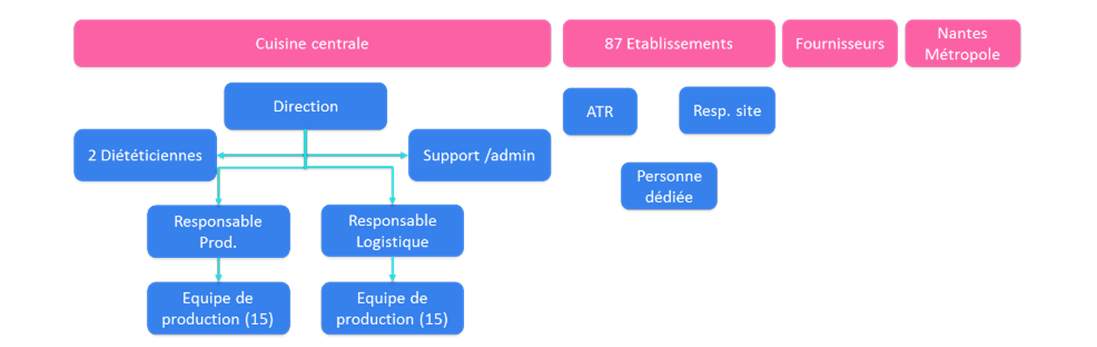

### 4 - Processus actuel

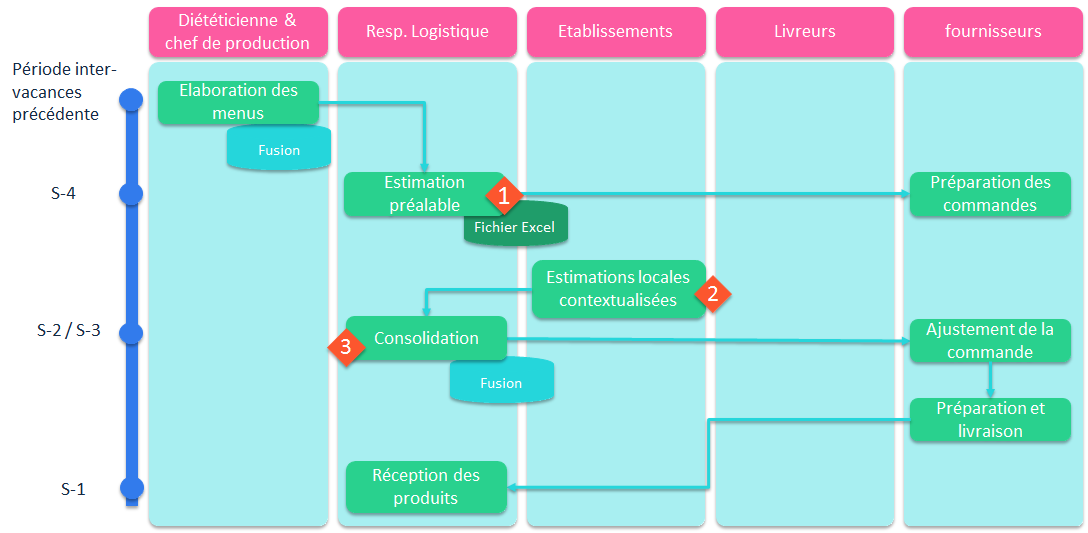

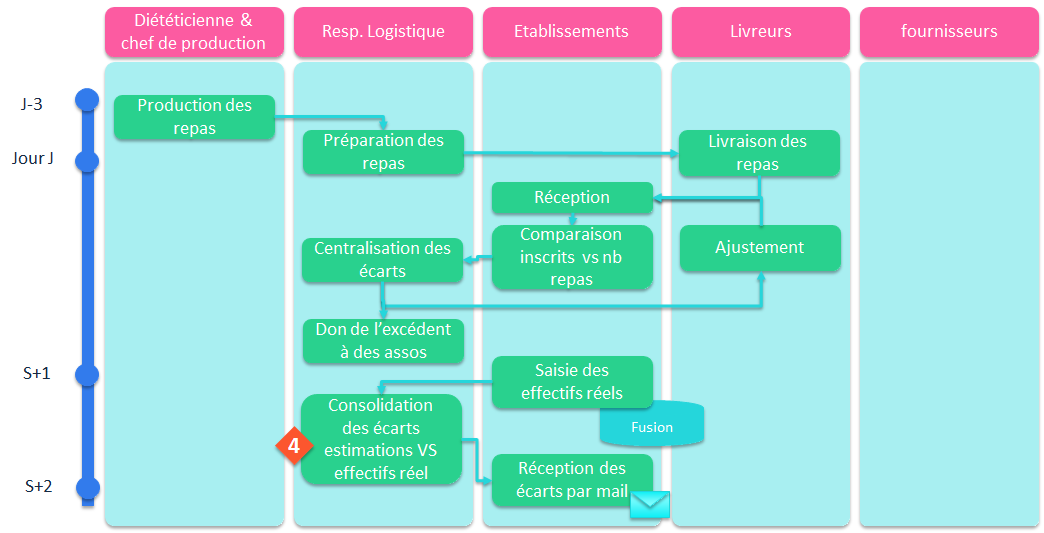

Les entêtes de colonnes indiquent les acteurs mobilisés ; 

l’axe vertical à gauche du graphique indique la position de chaque étape par rapport au jour de consommation (S = semaine et J = jour) ; 

les blocs verts indiquent les étapes du processus de planification, réalisation et suivi de la production  ; les blocs bleus indiquent les outils numériques utilisés ; 

les losanges orange indiquent les étapes auxquelles les outils de modélisation peuvent être utilisés.

Les quatre losanges mis en évidence en orange sur le schéma représentent les étapes auxquelles des interactions peuvent être développées entre l’outil de modélisation statistique et le processus de préparation des repas de la cuisine centrale à Nantes. 

Une fois les menus pour une période intervacances validés par la commission de restauration, ils sont transmis au responsable logistique. Celui-ci réalise des estimations globales de la fréquentation attendue et passe ses commandes auprès des fournisseurs locaux environ un mois à l’avance. L'objectif de votre travail est de fiabiliser cette étape (losange 1) à l'aide d'un modèle statistique.



### 5 - Votre mission 


Analyser le jeu de données afin de repérer des variables pertinentes pour la mission. 

Tout au long de l’analyse, produire des visualisations afin de mieux comprendre les données. 

Nettoyer le jeu de données : identifier les colonnes inutiles (variables non pertinentes) et vérifier si toutes les lignes sont exploitables 

Effectuer une analyse univariée pour chaque variable intéressante, afin de synthétiser son comportement. Variez les graphiques (boxplots, histogrammes, diagrammes circulaires, nuages de points…) pour illustrer au mieux votre propos.

Confirmer ou infirmer les hypothèses à l’aide d’une analyse multivariée (plusieurs variables). Le plus important sera de déterminer les facteurs qui jouent le plus sur la fréquentation.

Identifier des arguments justifiant la faisabilité d'une fiabilisation des commandes en utilisant un modèle statistique. Est-ce possible d'après vous ?






### 6 - Recommandation

Le nombre de repas consommés par jour dépend fortement de l’effectif global (somme des effectifs de 87 établissements), or cet effectif a évolué sur les 10 ans d’historique. 

Pour les analyses, je vous recommande de créer dans votre dataframe une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.


### I. Import & étude préliminaire

In [1]:
# Import des datasets des librairies
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro

# Import des datasets
frequentation = pd.read_csv("frequentation.csv")
menus = pd.read_csv("menus.csv")

In [2]:
frequentation

,Unnamed: 0,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12289,11129,17373
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,0,0,0,0,10505,6554,551,12558,11808,17373
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12753,11741,17373
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,0,0,1,0,10505,6554,551,12812,12322,17373
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,0,0,0,0,7200,6453,493,12309,11302,17373
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,0,0,0,0,1274,9715,99,15991,10898,20685
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,0,0,0,0,1274,9715,99,15885,6442,20685
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,0,0,0,0,1274,9715,99,17436,9168,20685
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,0,0,0,0,1447,6839,441,16062,12371,20685


### Combien de repas gaspillés et quel coût par an ?

<Axes: title={'center': 'Evolution de la fréquentation des cantines par année'}, xlabel='annee_scolaire', ylabel='Nombre de repas'>

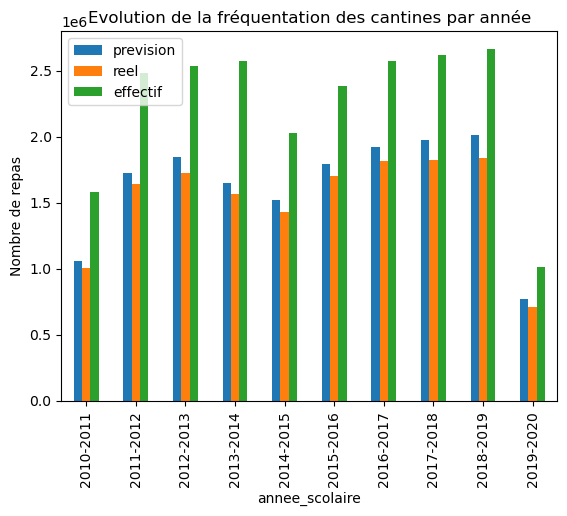

In [3]:
frequentation.groupby(['annee_scolaire']).agg({"prevision":"sum",'reel':"sum", 'effectif':"sum"}).plot(kind = "bar", title="Evolution de la fréquentation des cantines par année",ylabel="Nombre de repas")

In [4]:
freq_année = frequentation.groupby(['annee_scolaire']).agg({"prevision":"sum",'reel':"sum", 'effectif':"sum"})
freq_année['nbre_repas_gaspillés'] = freq_année["prevision"] - freq_année["reel"]
freq_année['ratio__selon_effectif'] = freq_année["nbre_repas_gaspillés"] / freq_année["effectif"] *100
freq_année['coût en €'] = freq_année["nbre_repas_gaspillés"] * 3
# freq_année['ratio'] = freq_année["prevision"] - freq_année["reel"]
freq_année.sort_values('coût en €', ascending = False)

,prevision,reel,effectif,nbre_repas_gaspillés,ratio__selon_effectif,coût en €
annee_scolaire,,,,,,
2018-2019,2014182,1837418,2665064,176764,6.632636,530292
2017-2018,1973900,1824072,2614498,149828,5.730660,449484
2012-2013,1842993,1722405,2531177,120588,4.764108,361764
2016-2017,1919098,1817881,2572709,101217,3.934258,303651
2015-2016,1791319,1698465,2383250,92854,3.896108,278562
2014-2015,1521998,1429320,2027325,92678,4.571443,278034
2013-2014,1651680,1563988,2572263,87692,3.409138,263076
2011-2012,1725015,1644180,2480110,80835,3.259331,242505
2019-2020,772362,711211,1013565,61151,6.033259,183453


### Y-a-t-il des jours où il y a trop de repas prévus ?

In [5]:
freq_date = frequentation.groupby(['date']).agg({"prevision":"sum",'reel':"sum"})
freq_date['nbre_repas_gaspillés'] = freq_date["prevision"] - freq_date["reel"]
freq_date

,prevision,reel,nbre_repas_gaspillés
date,,,
2011-01-03,12289,11129,1160
2011-01-04,12558,11808,750
2011-01-06,12753,11741,1012
2011-01-07,12812,12322,490
2011-01-10,12309,11302,1007
...,...,...,...
2019-12-09,15991,10898,5093
2019-12-10,15885,6442,9443
2019-12-13,17436,9168,8268


In [6]:
trop_repas = freq_date[freq_date.nbre_repas_gaspillés >=1 ]
trop_repas

,prevision,reel,nbre_repas_gaspillés
date,,,
2011-01-03,12289,11129,1160
2011-01-04,12558,11808,750
2011-01-06,12753,11741,1012
2011-01-07,12812,12322,490
2011-01-10,12309,11302,1007
...,...,...,...
2019-12-09,15991,10898,5093
2019-12-10,15885,6442,9443
2019-12-13,17436,9168,8268


In [7]:
trop_repas.describe(include = 'all')

,prevision,reel,nbre_repas_gaspillés
count,1140.000000,1140.000000,1140.000000
mean,14089.789474,13188.271053,901.518421
std,1097.048558,1295.947448,930.211856
min,9750.000000,4614.000000,10.000000
25%,13261.250000,12465.500000,522.750000
50%,14044.500000,13219.000000,698.500000
75%,14950.000000,14050.250000,930.250000
max,17989.000000,16423.000000,10478.000000


### Y-a-t-il des jours où il manque des repas ?

In [8]:
manque_repas = freq_date[freq_date.nbre_repas_gaspillés <0 ]
manque_repas

,prevision,reel,nbre_repas_gaspillés
date,,,
2011-02-24,10625,11916,-1291
2011-09-06,11720,11799,-79
2011-09-08,12022,12089,-67
2011-09-09,12117,12323,-206
2011-09-16,12413,12550,-137
2014-06-06,13172,13239,-67
2015-01-22,11442,12802,-1360
2015-09-15,13669,14651,-982
2015-09-28,12948,13216,-268


In [9]:
manque_repas.describe(include = 'all')

,prevision,reel,nbre_repas_gaspillés
count,16.000000,16.000000,16.000000
mean,13084.687500,13540.375000,-455.687500
std,1378.249794,1300.741577,454.186998
min,10625.000000,11799.000000,-1360.000000
25%,12093.250000,12493.250000,-723.250000
50%,13099.000000,13387.500000,-237.000000
75%,13723.250000,14499.500000,-100.000000
max,15847.000000,15954.000000,-67.000000


### Y-a-t-il des jours où l'équilibre est parfait ?

In [10]:
balance_repas = freq_date[freq_date.nbre_repas_gaspillés ==0 ]
balance_repas

,prevision,reel,nbre_repas_gaspillés
date,,,
2011-05-02,0,0,0
2011-05-03,0,0,0
2011-05-05,0,0,0
2011-05-06,0,0,0
2011-05-31,0,0,0
2011-06-13,0,0,0
2011-09-27,0,0,0
2011-10-11,0,0,0
2011-12-13,0,0,0


In [11]:
menus

,Unnamed: 0,date,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,2011-01-03,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0
1,1,2011-01-04,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0
2,2,2011-01-06,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0
3,3,2011-01-07,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0
4,4,2011-01-10,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0
1184,1184,2019-12-10,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0
1185,1185,2019-12-13,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0
1186,1186,2019-12-16,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0


Chaque dataset compte 1188 lignes et 23 colonnes pour frequentation / 10 colonnes pour menus

In [12]:
# Jointure entre frequentation et menus en prenant comme clé la colonne 'date'
# jointure externe afin de conserver toutes les lignes de mes fichiers
df = pd.merge(frequentation,menus, on = 'date', how= 'outer', indicator = True)
df

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both


In [13]:
df.shape

(1188, 33)

In [14]:
#regardons si la date est bien présente dans les deux data frame => 1188 rows ok
df[df._merge=="both"]

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,...,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,...,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,...,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,...,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,...,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,...,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,...,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,...,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,...,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,...,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both


In [15]:
# Créer une colonne correspondant à la fréquentation, c’est-à-dire au nombre de repas consommés par jour divisé par l’effectif global. 
# En analysant la fréquentation, on ne tient pas compte de l’effet d’échelle de l’effectif.
df['ratio_freq_effectif'] = df["reel"] / df["effectif"]

# Définir l'option pour afficher toutes les colonnes
pd.set_option('display.max_columns', None)
df

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge,ratio_freq_effectif
0,0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373,0,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,both,0.640592
1,1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373,1,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,both,0.679675
2,2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373,2,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,both,0.675819
3,3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373,3,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,both,0.709261
4,4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373,4,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,both,0.650550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1183,1183,2019-12-09,2019-2020,Lundi,50,Decembre,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15991,10898,20685,1183,"['Demi-pamplemousse', 'Omelette bio', 'Ratatou...",0,0,0,1,0,0,0,both,0.526855
1184,1184,2019-12-10,2019-2020,Mardi,50,Decembre,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,15885,6442,20685,1184,"['Choux rouges bio au gruyère', 'Sauté de porc...",1,1,0,1,0,0,0,both,0.311433
1185,1185,2019-12-13,2019-2020,Vendredi,50,Decembre,1,0,0,0,0,0,0,0,0,0,0,1274,9715,99,17436,9168,20685,1185,"['Betteraves', 'Poisson', 'Pommes rissolées', ...",0,0,1,1,0,0,0,both,0.443220
1186,1186,2019-12-16,2019-2020,Lundi,51,Decembre,1,0,0,0,0,0,0,0,0,0,0,1447,6839,441,16062,12371,20685,1186,"['Salade verte / demi-oeuf bio', 'Falafels bio...",0,0,0,1,0,0,0,both,0.598066


Décrire l’ensemble des variables présentes dans le dataset, discrètes et continues.

In [16]:
# Stats du dataframe
df.describe(include = 'all')

,Unnamed: 0_x,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,Unnamed: 0_y,menu,porc,viande,poisson,bio,noel,frites,an_chinois,_merge,ratio_freq_effectif
count,1188.000000,1188,1188,1188,1188.000000,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188.000000,1188,1188.000000
unique,NaN,1188,10,5,NaN,11,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
top,NaN,2011-01-03,2012-2013,Vendredi,NaN,Septembre,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN,NaN,NaN,NaN,both,NaN
freq,NaN,1,141,300,NaN,146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1188,NaN
mean,593.500000,NaN,NaN,NaN,25.842593,NaN,0.088384,0.000842,0.013468,0.021044,0.027778,0.026936,0.026094,0.022727,0.055556,0.076599,0.027778,2346.518519,4212.135522,706.073232,13696.729798,12837.773569,18890.589226,593.500000,NaN,0.137205,0.563131,0.250000,0.387205,0.006734,0.031987,0.003367,NaN,0.678523
std,343.090367,NaN,NaN,NaN,15.877945,NaN,0.283972,0.029013,0.115316,0.143591,0.164405,0.161965,0.159483,0.149095,0.229158,0.266067,0.164405,4778.634345,2627.853230,1067.539442,2527.794888,2490.102028,1013.282762,343.090367,NaN,0.344209,0.496207,0.433195,0.487316,0.081819,0.176038,0.057953,NaN,0.124818
min,0.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17373.000000,0.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.000000
25%,296.750000,NaN,NaN,NaN,12.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2179.000000,103.000000,13167.250000,12389.750000,17955.000000,296.750000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.684358
50%,593.500000,NaN,NaN,NaN,24.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,371.000000,3458.000000,415.000000,13991.000000,13184.000000,18633.000000,593.500000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,0.703112
75%,890.250000,NaN,NaN,NaN,41.000000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1910.000000,5858.000000,921.000000,14910.000000,14016.500000,19958.000000,890.250000,NaN,0.000000,1.000000,0.250000,1.000000,0.000000,0.000000,0.000000,NaN,0.722796


Observer d’abord en détail les variables discrètes.

In [17]:
df.isna().sum()

Unnamed: 0_x           0
date                   0
annee_scolaire         0
jour                   0
semaine                0
mois                   0
greves                 0
ferie                  0
veille_ferie           0
retour_ferie           0
vacances               0
retour_vacances        0
veille_vacances        0
fete_musulmane         0
ramadan                0
fete_chretienne        0
fete_juive             0
inc_grippe             0
inc_gastro             0
inc_varicelle          0
prevision              0
reel                   0
effectif               0
Unnamed: 0_y           0
menu                   0
porc                   0
viande                 0
poisson                0
bio                    0
noel                   0
frites                 0
an_chinois             0
_merge                 0
ratio_freq_effectif    0
dtype: int64

In [18]:
#Doublon
df.duplicated().sum()

0

In [19]:
# Affichage des informations
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1188 entries, 0 to 1187
Data columns (total 34 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Unnamed: 0_x         1188 non-null   int64   
 1   date                 1188 non-null   object  
 2   annee_scolaire       1188 non-null   object  
 3   jour                 1188 non-null   object  
 4   semaine              1188 non-null   int64   
 5   mois                 1188 non-null   object  
 6   greves               1188 non-null   int64   
 7   ferie                1188 non-null   int64   
 8   veille_ferie         1188 non-null   int64   
 9   retour_ferie         1188 non-null   int64   
 10  vacances             1188 non-null   int64   
 11  retour_vacances      1188 non-null   int64   
 12  veille_vacances      1188 non-null   int64   
 13  fete_musulmane       1188 non-null   int64   
 14  ramadan              1188 non-null   int64   
 15  fete_chretienne      

In [20]:
for col in df.select_dtypes('object'):
    print(f'{col :-<20} {df[col].unique()}')

date---------------- ['2011-01-03' '2011-01-04' '2011-01-06' ... '2019-12-13' '2019-12-16'
 '2019-12-19']
annee_scolaire------ ['2010-2011' '2011-2012' '2012-2013' '2013-2014' '2014-2015' '2015-2016'
 '2016-2017' '2017-2018' '2018-2019' '2019-2020']
jour---------------- ['Lundi' 'Mardi' 'Jeudi' 'Vendredi' 'Mercredi']
mois---------------- ['Janvier' 'Fevrier' 'Mars' 'Avril' 'Mai' 'Juin' 'Juillet' 'Septembre'
 'Octobre' 'Novembre' 'Decembre']
menu---------------- ["['Pamplemousse', 'Hachis Parmentier', 'Salade verte', 'Flan caramel']"
 "['Crêpe au fromage', 'emincé de volaille à la forestière', 'haricots beurre / haricots plats', 'St paulin', 'ananas']"
 "['thon', 'Mâche au thon', 'Croziflette', 'des de canard', 'des de volaille', 'Yaourt brasse bio']"
 ...
 "['Betteraves', 'Poisson', 'Pommes rissolées', 'Tomme blanche', 'Kiwi bio°']"
 "['Salade verte / demi-oeuf bio', 'Falafels bio aux pois chiches et patate douce sauce tomate', 'Céréales gourmandes bio', 'Yaourt fermier bio°']"
 "['Pot

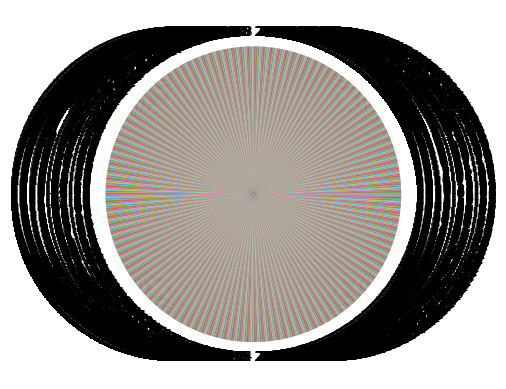

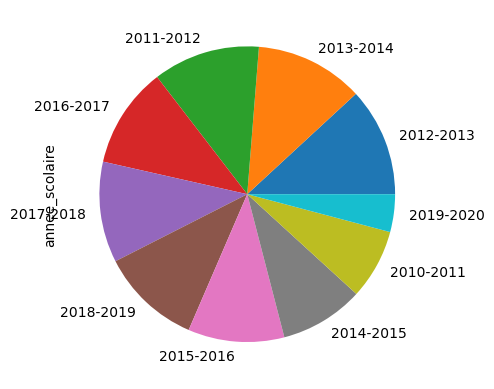

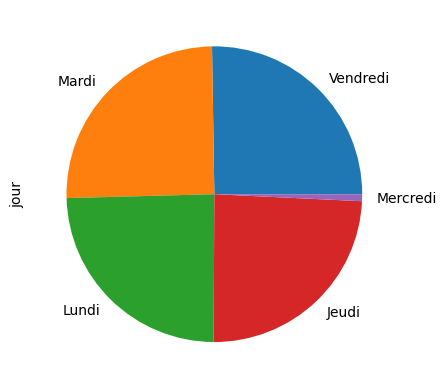

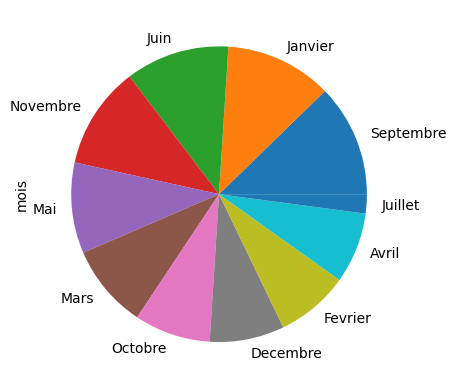

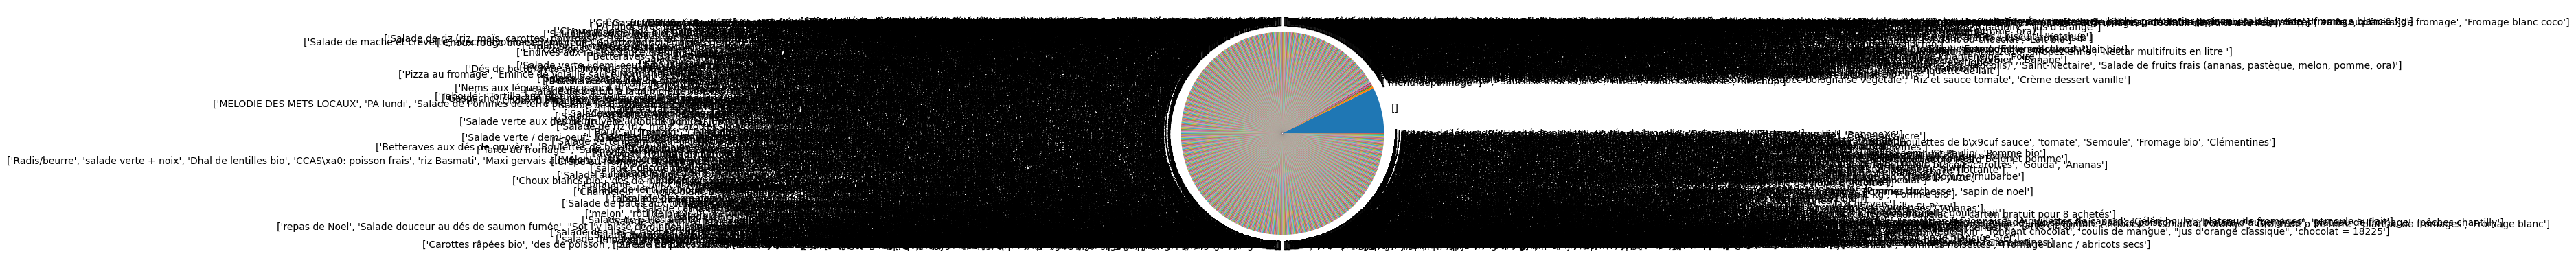

In [21]:
for col in df.select_dtypes('object'):
    plt.figure()
    df[col].value_counts().plot.pie()

### Conclusion :

Variable target : reel

prevision, reel, effectif :
Dans ces colonnes, l'unité est le nombre d'élèves et personnel scolaire 

ratio_freq_effectif :
La moyenne est de 0.678523
Vérifier ce qui se passe les dates pour le ratio est inférieur à 0,6

inc_grippe, inc_gastro, inc_varicelle :
Ces colonnes font référence à une incidence épidémique sur le département LA 

greves	ferie	veille_ferie	retour_ferie	vacances	retour_vacances veille_vacances	fete_musulmane	ramadan	fete_chretienne	fete_juive porc	viande	poisson	bio	noel	frites	an_chinois : 
Ces colonnes renvoient un booléen avec comme varialbes 0 ou 1

La méthode describe() révèle peu de valeurs aberrantes dans les données.

Vaiables années scolaires :
2010-2011, 2019-2020 comptent moins de données
Ces années scolaires ne sont pas complètent : 2eme semestre pour la première et 1 semestre pour la seconde

Variable jour : 
Mercredi est sous representé comparé aux autres jours. 
Il s'agit d'anomalie (pouvant être liée au centre de loisirs), car il n'y a pas de cantines scolaires ces jours-ci.

Variable mois :
Août n'est pas représenté, car pas de cantine durant les vacances scolaires.
Pour la même raison, juillet est sous représenté

Variable menu :
La colonne compte plus de 20 valeurs différentes, on imagine qu'il y a autant de menus que de dates, c'est pourquoi la segmentation des menus se fait selon une ou plusieurs catégories : porc, viande, poisson, bio, noel, frites, an_chinois
Il faudra vérifier les lignes où [] est présent dans la colonne menu. Bien souvent, aucune catégorie n'y est associé.
Notons que lorsque porc est True, viande l'est également.
Notons que lorsque viande est True, porc ne l'est pas nécessairement.


Actions / vérifications :

colonne inutiles : Unnamed: 0_x, Unnamed: 0_y, _merge, mercredi

colonne effectif : chiffre rond
croissance des effectifs et évolution des habitudes

Absence de NaN et de doublon
Le jeu de donnée est plutôt propre, mais certaines valeurs basées sur du texte pourrait être exploitées autrement : jour, mois

Amélioration possible du dataset : dans la variable menu, certains plats étant associés à du porc, mais cuisinés avec de la viande sans porc, réponde True dans les colonnes porc et viande : ex avec cordon bleu de volaille ou croziflettes au dé de canard.
Y-a-t'il un menu de substituion pour les élèves qui ne mangent pas de porc ?


In [22]:
# Sélectionner les lignes où la colonne "ratio_freq_effectif" est inférieure à 0.6
ind5 = df[df["ratio_freq_effectif"] <0.6].index
low_freq = df.loc[ind5, ['greves', 'ferie', 'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances', 'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne', 'fete_juive', 'inc_grippe', 'inc_gastro', 'inc_varicelle', 'porc', 'viande', 'poisson', 'bio', 'noel', 'frites', 'an_chinois']]

# Calculer les sommes des colonnes
sums = low_freq.sum()

# Ajouter une nouvelle ligne avec les sommes calculées
low_freq = low_freq.append(sums, ignore_index=True)

low_freq

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10820\2459205914.py:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  low_freq = low_freq.append(sums, ignore_index=True)


,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,porc,viande,poisson,bio,noel,frites,an_chinois
0,0,0,0,0,0,0,0,0,0,0,0,3661,5813,350,0,1,0,0,0,0,0
1,0,0,0,1,1,0,0,0,0,0,0,0,1245,459,0,1,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,1245,459,0,1,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,1245,459,1,1,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,1245,459,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0,0,0,0,0,0,0,0,0,0,0,1274,9715,99,1,1,0,1,0,0,0
96,1,0,0,0,0,0,0,0,0,0,0,1274,9715,99,0,0,1,1,0,0,0
97,1,0,0,0,0,0,0,0,0,0,0,1447,6839,441,0,0,0,1,0,0,0
98,1,0,0,0,0,0,0,0,0,0,0,1447,6839,441,0,1,0,0,0,0,0


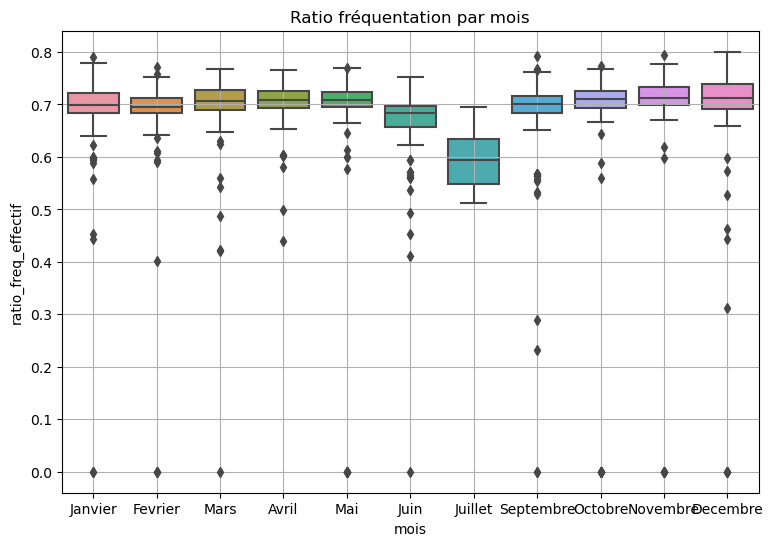

In [23]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="ratio_freq_effectif",data=df, showfliers=True)
plt.title('Ratio fréquentation par mois')
plt.grid()
plt.show()

# Nettoyage

In [24]:
# Suppression de colonnes inutiles
df = df.drop(['Unnamed: 0_x', 'Unnamed: 0_y', '_merge'], axis=1)

# Supprimer toutes les lignes mercredis hors spectre (pas de cantines scolaires ces jours, même si parfois des repas sont comptabilisés, ils seraient commandés par les centres de loisirs)
ind = df[df["jour"] == 'Mercredi'].index
df.drop(ind, inplace = True)

ind2 = df[df["greves"] == 1].index
df.drop(ind2, inplace = True)

ind3 = df[df["ferie"] == 1].index
df.drop(ind3, inplace = True)

ind4 = df[df["vacances"] == 1].index
df.drop(ind4, inplace = True)

ind5 = df[df["ratio_freq_effectif"] <0.6].index
df.drop(ind5, inplace = True)

ind6 = df[df["menu"] == '[]'].index
#df.drop(ind6, inplace = True)

# Filtrer le DataFrame en fonction de la colonne "année"
# Utile pour vérifier si les tendances des 4 derniers années influent sur la fréquention et permettent d'améliorer notre modèle
# annees_incluses = ['2015-2016', '2017-2018', '2018-2019', '2019-2020']
# df = df[df['annee_scolaire'].isin(annees_incluses)]

In [25]:
df.describe()

,semaine,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,porc,viande,poisson,bio,noel,frites,an_chinois,ratio_freq_effectif
count,1003.000000,1003.0,1003.0,1003.000000,1003.000000,1003.0,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000,1003.000000
mean,26.019940,0.0,0.0,0.008973,0.018943,0.0,0.031904,0.028913,0.021934,0.056830,0.076770,0.028913,2403.887338,4219.879362,622.780658,14052.538385,13357.440678,18851.639083,0.135593,0.558325,0.264207,0.393819,0.006979,0.031904,0.002991,0.708115
std,16.092162,0.0,0.0,0.094347,0.136392,0.0,0.175833,0.167646,0.146542,0.231632,0.266358,0.167646,4841.760009,2625.671635,754.815110,1035.980868,1015.739252,1001.364549,0.342527,0.496834,0.441130,0.488839,0.083290,0.175833,0.054636,0.029117
min,1.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,10625.000000,10823.000000,17373.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.602785
25%,12.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.500000,2236.000000,98.000000,13257.000000,12566.000000,17955.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.690826
50%,24.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,377.000000,3458.000000,396.000000,13988.000000,13273.000000,18633.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.706326
75%,41.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2003.000000,5813.000000,903.500000,14891.000000,14088.000000,19639.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.725060
max,51.000000,0.0,0.0,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,35064.000000,13855.000000,5821.000000,17201.000000,16423.000000,20685.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.800550


In [26]:
df

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,ratio_freq_effectif
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,0.640592
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,0.679675
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,0.675819
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,0.709261
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,0.650550
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2019-11-25,2019-2020,Lundi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15880,15143,20685,"['Mâche aux graines de tournesol bio', 'Parmen...",0,0,0,1,0,0,0,0.732076
1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15847,15954,20685,"['Choux blancs bio à la mimolette', 'Boulettes...",0,1,0,1,0,0,0,0.771284
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15832,14864,20685,"['Pizza au fromage', ""Rôti de dinde jus d'épic...",0,1,0,1,0,0,0,0.718588
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,17201,16423,20685,"['Céleri rémoulade bio', 'Lieu sauce du Perray...",0,0,1,1,0,0,0,0.793957


## II. Analyse exploratoire des données

In [27]:
liste_colonnes = df.columns.tolist()
liste_colonnes

['date',
 'annee_scolaire',
 'jour',
 'semaine',
 'mois',
 'greves',
 'ferie',
 'veille_ferie',
 'retour_ferie',
 'vacances',
 'retour_vacances',
 'veille_vacances',
 'fete_musulmane',
 'ramadan',
 'fete_chretienne',
 'fete_juive',
 'inc_grippe',
 'inc_gastro',
 'inc_varicelle',
 'prevision',
 'reel',
 'effectif',
 'menu',
 'porc',
 'viande',
 'poisson',
 'bio',
 'noel',
 'frites',
 'an_chinois',
 'ratio_freq_effectif']

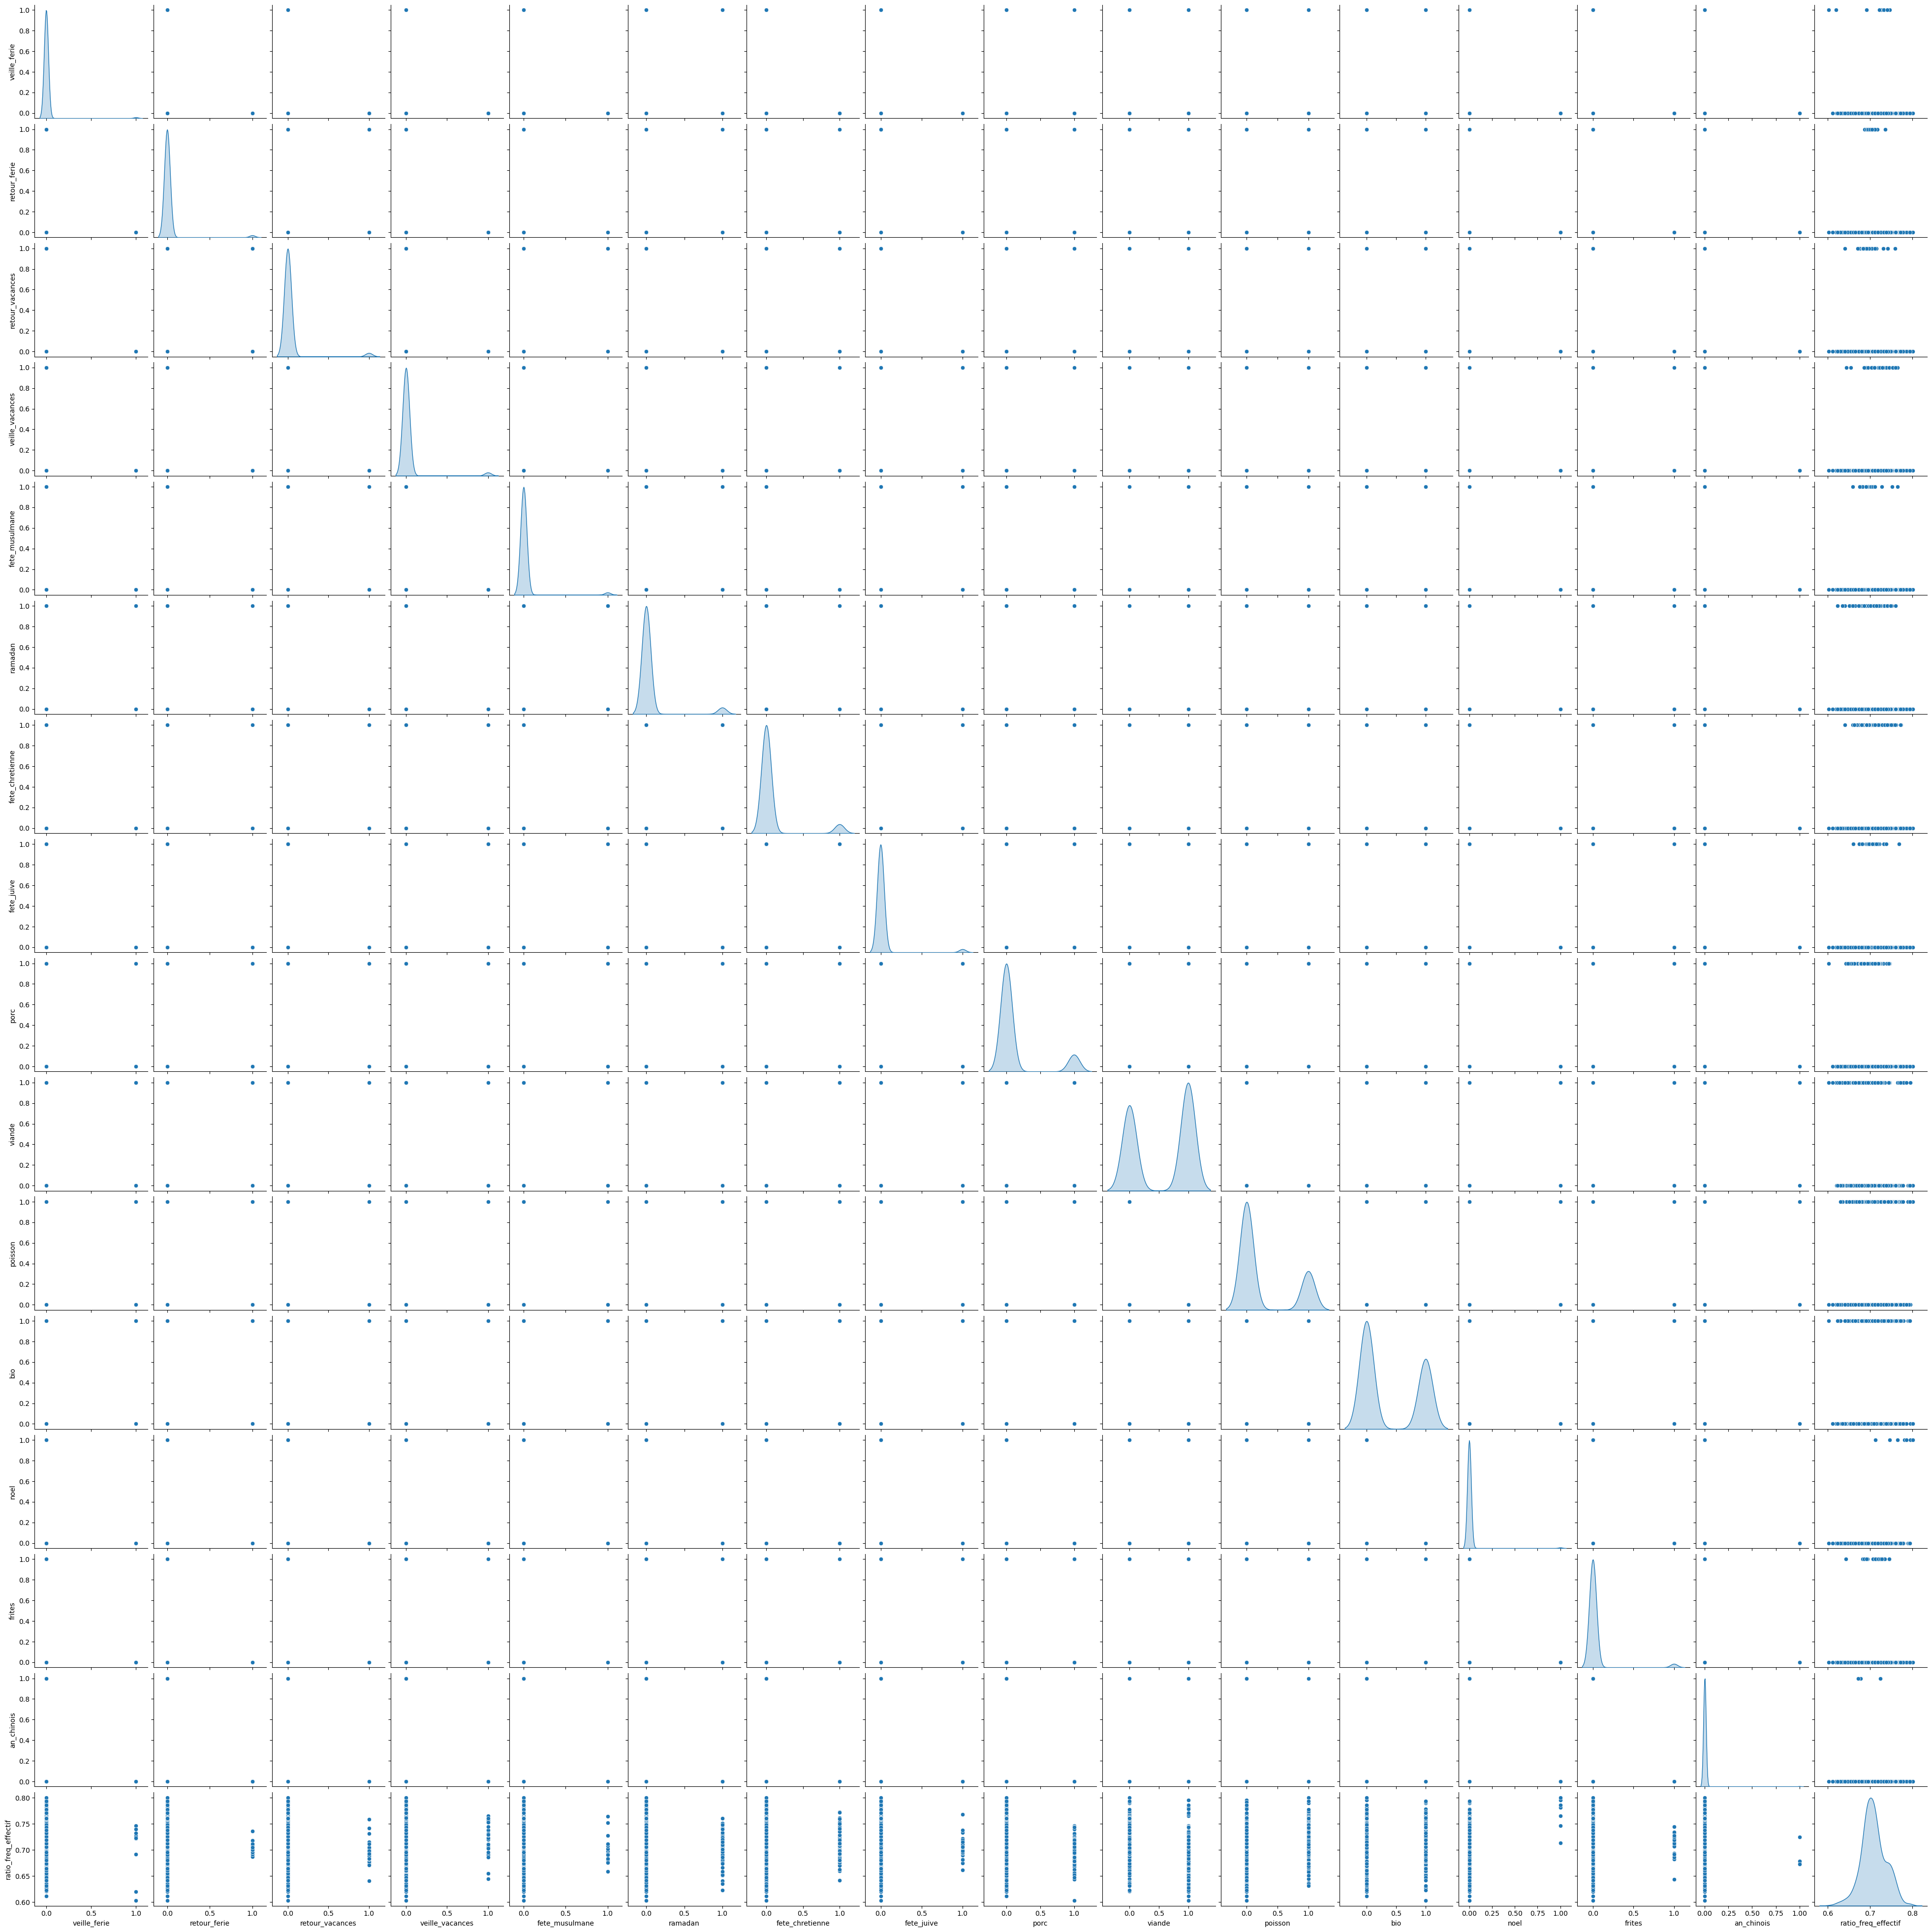

In [28]:
sns.pairplot(df[[
# 'date', 
# 'annee_scolaire',
 'jour',
# 'semaine',
 'mois',
 'veille_ferie',
 'retour_ferie',
 'retour_vacances',
 'veille_vacances',
 'fete_musulmane',
 'ramadan',
 'fete_chretienne',
 'fete_juive',
# 'reel',
 'porc',
 'viande',
 'poisson',
 'bio',
 'noel',
 'frites',
 'an_chinois',
 'ratio_freq_effectif']], diag_kind='kde')

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10820\1506019939.py:25: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  'ratio_freq_effectif']].corr().round(2), annot=True, cmap="Blues")


<Axes: >

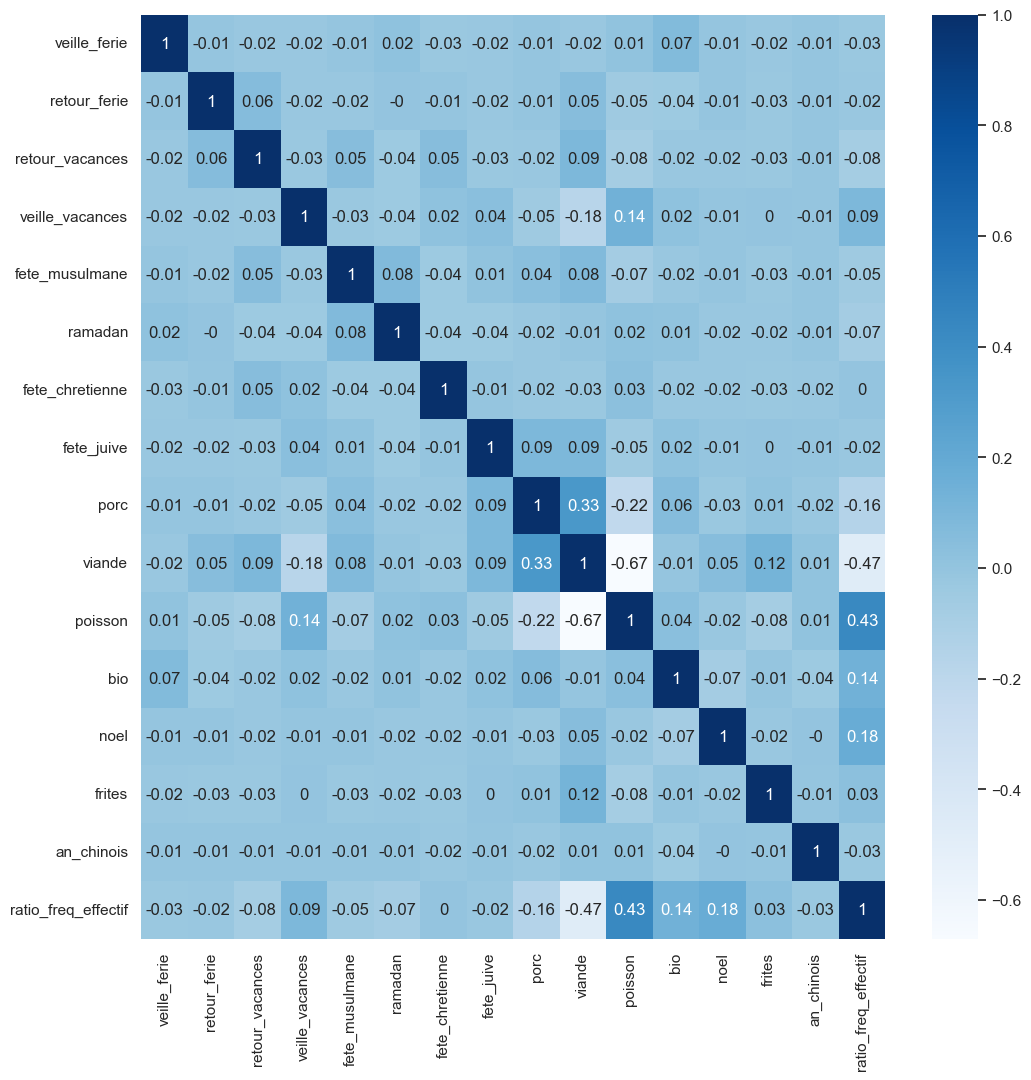

In [29]:
f = plt.figure(figsize=(12, 12))
sns.set()
sns.heatmap(df[[
# 'date', 
# 'annee_scolaire',
 'jour',
# 'semaine',
 'mois',
 'veille_ferie',
 'retour_ferie',
 'retour_vacances',
 'veille_vacances',
 'fete_musulmane',
 'ramadan',
 'fete_chretienne',
 'fete_juive',
# 'reel',
 'porc',
 'viande',
 'poisson',
 'bio',
 'noel',
 'frites',
 'an_chinois',
 'ratio_freq_effectif']].corr().round(2), annot=True, cmap="Blues")

### Analyse globale de la fréquentation par année scolaire

Sur 100 dates où la fréquention est inférieure à 60%, 52 dates sont impactés en raison d'une grève.
Les jours de grève n'étant pas anticipable plus d'un mois à l'avance, il est préférable de se séparer des lignes.

<Axes: title={'center': 'Nombre de repas servis par année'}, xlabel='annee_scolaire', ylabel='Reel'>

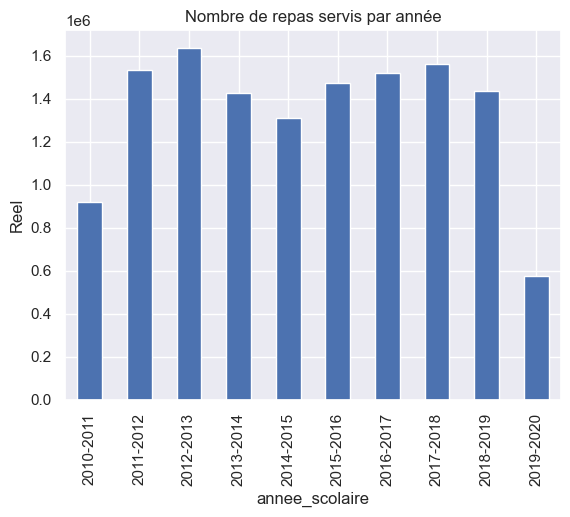

In [30]:
df.groupby(["annee_scolaire"]).reel.sum().plot(kind = "bar", title="Nombre de repas servis par année",ylabel="Reel")

<Axes: title={'center': 'Nombre de repas servis en fonction du mois'}, xlabel='mois', ylabel='Reel'>

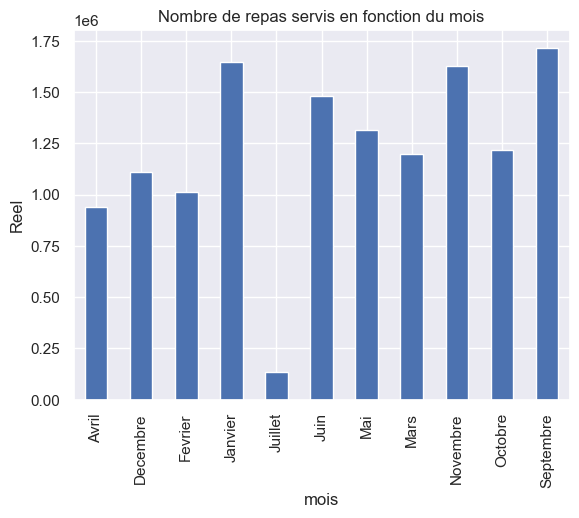

In [31]:
df.groupby(["mois"]).reel.sum().plot(kind = "bar", title="Nombre de repas servis en fonction du mois",ylabel="Reel")

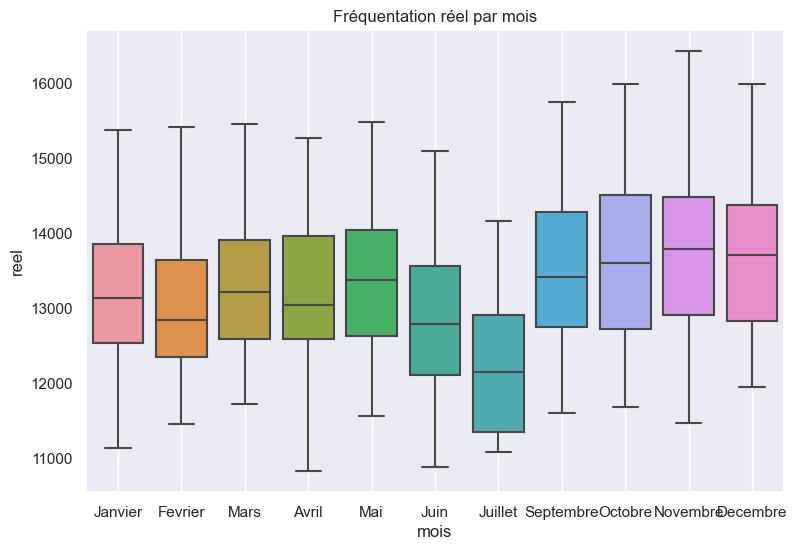

In [32]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="reel",data=df, showfliers=True)
plt.title('Fréquentation réel par mois')
plt.grid()
plt.show()

<Axes: title={'center': 'Nombre de repas servis en fonction du jour de la semaine'}, xlabel='jour', ylabel='Reel'>

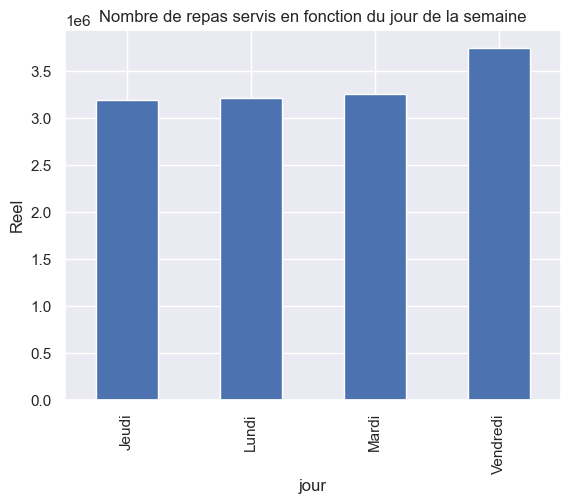

In [33]:
df.groupby(["jour"]).reel.sum().plot(kind = "bar", title="Nombre de repas servis en fonction du jour de la semaine",ylabel="Reel")

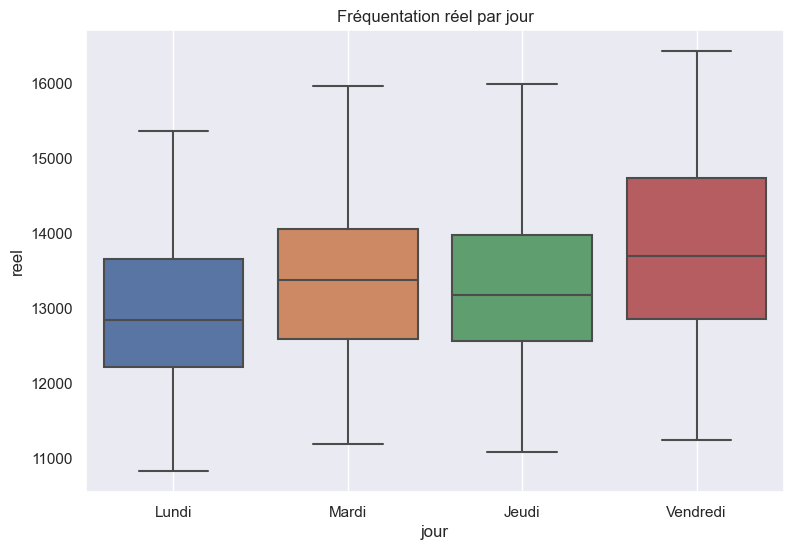

In [34]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='jour',y="reel",data=df, showfliers=True)
plt.title('Fréquentation réel par jour')
plt.grid()
plt.show()

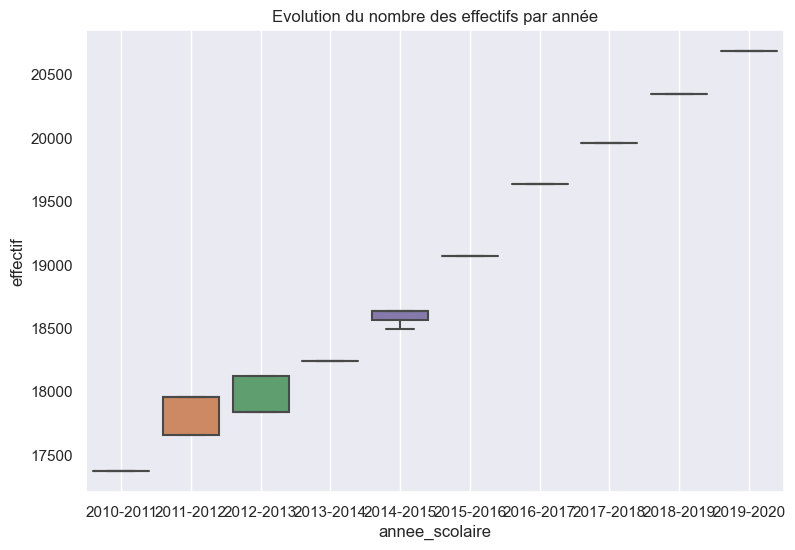

In [35]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='annee_scolaire',y="effectif",data=df, showfliers=True)
plt.title('Evolution du nombre des effectifs par année')
plt.grid()
plt.show()

In [36]:
# calculer la moyenne des effectifs par année
df.groupby("annee_scolaire").effectif.mean()

annee_scolaire
2010-2011    17373.000000
2011-2012    17843.185484
2012-2013    17958.723077
2013-2014    18243.000000
2014-2015    18598.656566
2015-2016    19066.000000
2016-2017    19639.000000
2017-2018    19958.000000
2018-2019    20344.000000
2019-2020    20685.000000
Name: effectif, dtype: float64

La moyenne des effectifs devraient tomber sur un chiffre rond.

Conclusion : nettoyer le jeu de données pour l'année ou pas

2010-2011    < ou > 17383

2011-2012    < ou > 17660 17955

2012-2013    < ou > 18123 17842

2014-2015    < ou > 18663

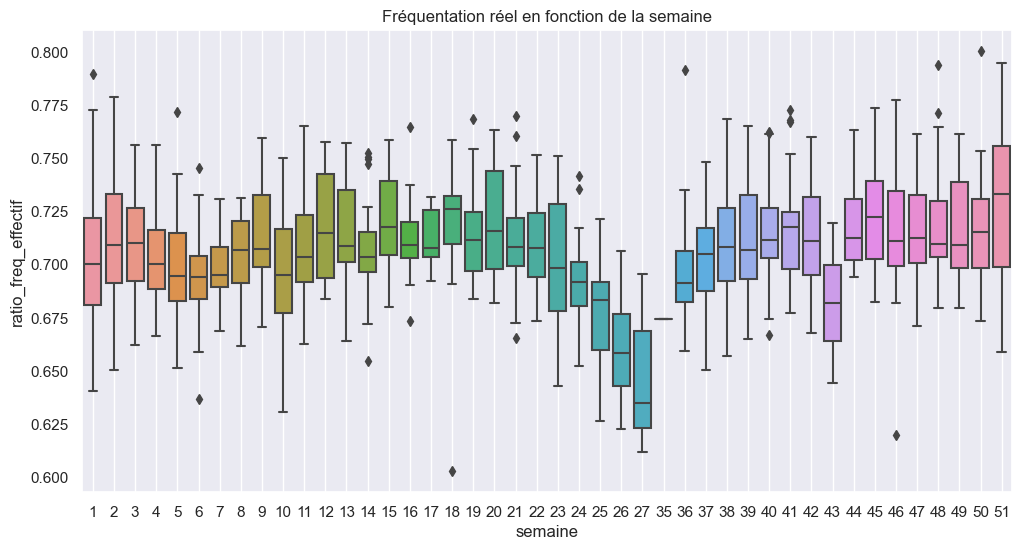

In [37]:
fig = plt.figure(1, figsize=(12,6))
sns.boxplot(x='semaine',y="ratio_freq_effectif",data=df, showfliers=True)
plt.title('Fréquentation réel en fonction de la semaine')
plt.grid()
plt.show()

<Axes: title={'center': 'Nombres de repas servis par semaine'}, xlabel='semaine', ylabel='Reel'>

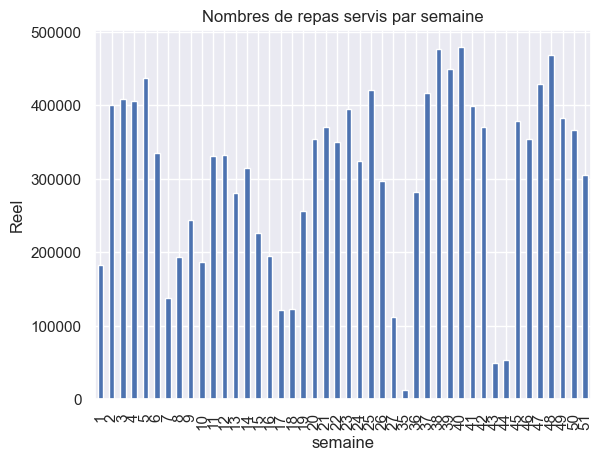

In [38]:
df.groupby(["semaine"]).reel.sum().plot(kind = "bar", title="Nombres de repas servis par semaine",ylabel="Reel")

## Analyse des indices épidémiques

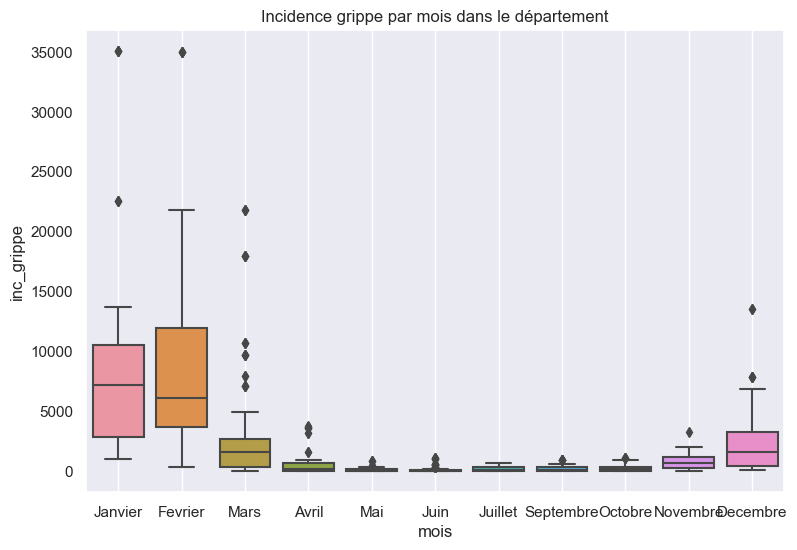

In [39]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_grippe",data=df, showfliers=True)
plt.title('Incidence grippe par mois dans le département')
plt.grid()
plt.show()

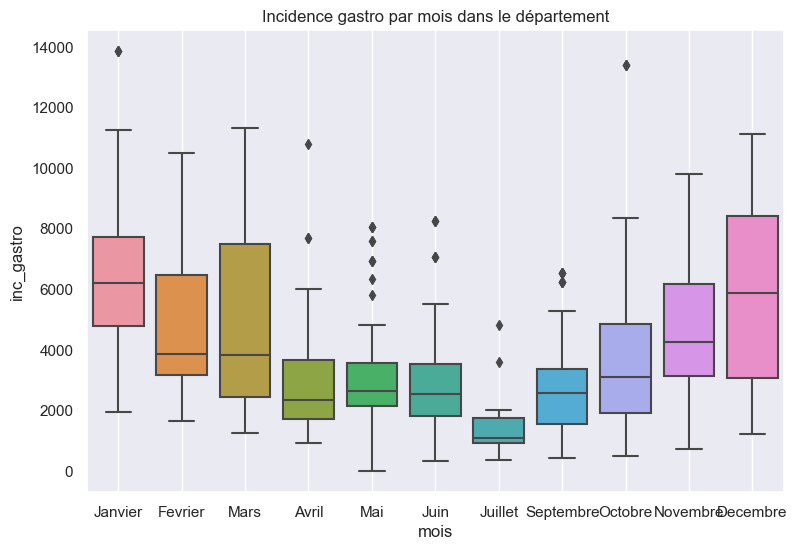

In [40]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_gastro",data=df, showfliers=True)
plt.title('Incidence gastro par mois dans le département')
plt.grid()
plt.show()

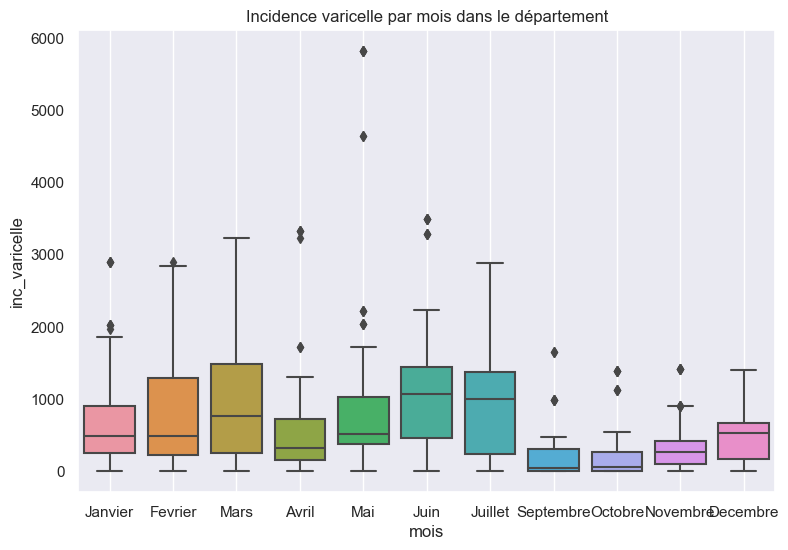

In [41]:
fig = plt.figure(1, figsize=(9,6))
sns.boxplot(x='mois',y="inc_varicelle",data=df, showfliers=True)
plt.title('Incidence varicelle par mois dans le département')
plt.grid()
plt.show()

Distingons pour plusieurs pics épidémiques, notament pour la grippe et la gastro.
S'il existe une saisonalité, il reste difficile de prévoir les pics un mois à l'avance.
Il est préférable de se séparer des ces variables et retenir les variables mois/saisonalité.

### 13 - Analyse par catégorie

In [42]:
# Sélectionner les colonnes souhaitées
types_menus = df.groupby(['annee_scolaire']).agg({'menu':"count",'porc':"sum", 'viande':"sum", 'poisson':"sum", 'bio':"sum", 'noel':"sum", 'frites':"sum", 'an_chinois':"sum"}).reset_index()
# Calculer les sommes des colonnes
sums = types_menus.sum()

# Ajouter une nouvelle ligne avec les sommes calculées
types_menus = types_menus.append(sums, ignore_index=True)

types_menus

C:\Users\Utilisateur\AppData\Local\Temp\ipykernel_10820\2496262045.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  types_menus = types_menus.append(sums, ignore_index=True)


,annee_scolaire,menu,porc,viande,poisson,bio,noel,frites,an_chinois
0,2010-2011,77,18,51,21,21,0,3,1
1,2011-2012,124,27,77,38,36,1,5,1
2,2012-2013,130,6,30,22,21,1,2,0
3,2013-2014,110,18,71,29,34,1,3,1
4,2014-2015,99,13,61,25,37,1,4,0
5,2015-2016,108,18,64,36,44,1,3,0
6,2016-2017,109,15,67,27,64,1,3,0
7,2017-2018,109,10,64,31,63,0,6,0
8,2018-2019,99,9,55,26,47,1,1,0
9,2019-2020,38,2,20,10,28,0,2,0


<Axes: title={'center': 'Tendance des menus par année scolaire'}, xlabel='annee_scolaire', ylabel='Nombre de menus'>

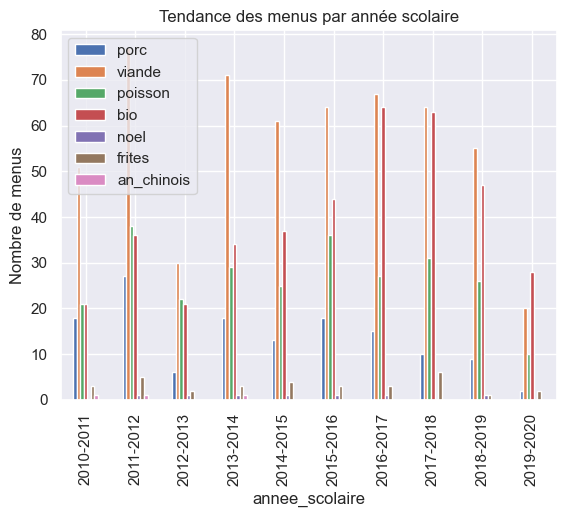

In [43]:
df.groupby(['annee_scolaire']).agg({"porc":"sum",'viande':"sum", 'poisson':"sum", 'bio':"sum", 'noel':"sum", 'frites':"sum", 'an_chinois':"sum"}).plot(kind = "bar", title="Tendance des menus par année scolaire",ylabel="Nombre de menus")

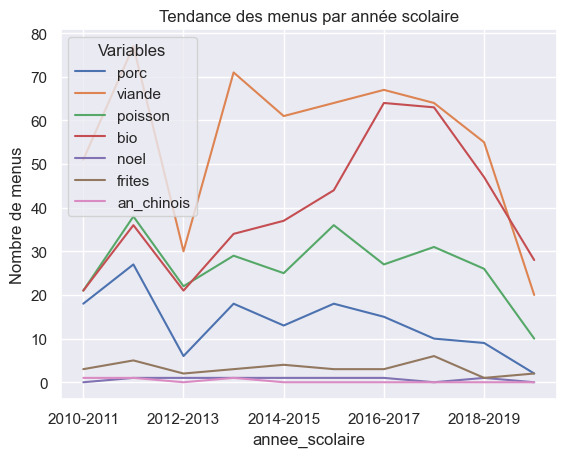

In [44]:
# Grouper les données par 'annee_scolaire' et calculer la somme de chaque variable
grouped_data = df.groupby(['annee_scolaire']).agg({"porc": "sum", 'viande': "sum", 'poisson': "sum", 'bio': "sum", 'noel': "sum", 'frites': "sum", 'an_chinois': "sum"})

# Tracer les courbes pour chaque variable en utilisant kind='line'
grouped_data.plot(kind="line", title="Tendance des menus par année scolaire", ylabel="Nombre de menus")
plt.legend(title='Variables')
plt.show()

# Engineering features
bio + non_bio = menu = viande + poisson + vege

viande = porc + sans_porc = viande

colonne à créer : non_bio, vege, sans_porc 

Y a t-il plus de reel lorsqu'il y a du bio au menu ?
Y a t-il plus de reel lorsqu'il y a du porc au menu ?
Y a t-il plus de reel lorsqu'il y a du viande au menu ?
Y a t-il plus de reel lorsqu'il y a du poisson au menu ?
Si les repas ne sont sans viande ou poisson, alors ils sont végé.
Y a t-il plus de reel lorsqu'il y a du végétarien au menu ?
Spécificités :
Y a t-il plus de reel lorsque c'est le repas de Noël ?
Y a t-il plus de reel lorsqu'il y a des frites au menu ?
Y a t-il plus de reel lorsqu'il y a le Nouvel An chinois au menu ?

In [45]:
#get_dummies permets de transformer des données qualifiantes sous forme de booléen
dum_mois = pd.get_dummies(df.mois)
dum_jour = pd.get_dummies(df.jour)
dum = dum_mois.join(dum_jour)
dum

,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre,Jeudi,Lundi,Mardi,Vendredi
0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1178,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1179,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1180,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [46]:
df_final = df.join(dum)
df_final

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,ratio_freq_effectif,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre,Jeudi,Lundi,Mardi,Vendredi
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,0.640592,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,0.679675,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,0.675819,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,0.709261,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,0.650550,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2019-11-25,2019-2020,Lundi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15880,15143,20685,"['Mâche aux graines de tournesol bio', 'Parmen...",0,0,0,1,0,0,0,0.732076,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15847,15954,20685,"['Choux blancs bio à la mimolette', 'Boulettes...",0,1,0,1,0,0,0,0.771284,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15832,14864,20685,"['Pizza au fromage', ""Rôti de dinde jus d'épic...",0,1,0,1,0,0,0,0.718588,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,17201,16423,20685,"['Céleri rémoulade bio', 'Lieu sauce du Perray...",0,0,1,1,0,0,0,0.793957,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


In [47]:
df_final = df_final.copy()

In [48]:
df_final

,date,annee_scolaire,jour,semaine,mois,greves,ferie,veille_ferie,retour_ferie,vacances,retour_vacances,veille_vacances,fete_musulmane,ramadan,fete_chretienne,fete_juive,inc_grippe,inc_gastro,inc_varicelle,prevision,reel,effectif,menu,porc,viande,poisson,bio,noel,frites,an_chinois,ratio_freq_effectif,Avril,Decembre,Fevrier,Janvier,Juillet,Juin,Mai,Mars,Novembre,Octobre,Septembre,Jeudi,Lundi,Mardi,Vendredi
0,2011-01-03,2010-2011,Lundi,1,Janvier,0,0,0,0,0,1,0,0,0,0,0,10505,6554,551,12289,11129,17373,"['Pamplemousse', 'Hachis Parmentier', 'Salade ...",0,1,0,0,0,0,0,0.640592,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1,2011-01-04,2010-2011,Mardi,1,Janvier,0,0,0,0,0,0,0,0,0,0,0,10505,6554,551,12558,11808,17373,"['Crêpe au fromage', 'emincé de volaille à la ...",0,1,0,0,0,0,0,0.679675,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
2,2011-01-06,2010-2011,Jeudi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12753,11741,17373,"['thon', 'Mâche au thon', 'Croziflette', 'des ...",1,1,0,1,0,0,0,0.675819,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0
3,2011-01-07,2010-2011,Vendredi,1,Janvier,0,0,0,0,0,0,0,0,0,1,0,10505,6554,551,12812,12322,17373,"['Choux blancs mimolette', 'milanette en des',...",0,0,1,0,0,0,0,0.709261,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1
4,2011-01-10,2010-2011,Lundi,2,Janvier,0,0,0,0,0,0,0,0,0,0,0,7200,6453,493,12309,11302,17373,"['Endives / demi-\x9cuf', 'paella de la mer', ...",0,0,1,0,0,0,0,0.650550,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1177,2019-11-25,2019-2020,Lundi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15880,15143,20685,"['Mâche aux graines de tournesol bio', 'Parmen...",0,0,0,1,0,0,0,0.732076,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
1178,2019-11-26,2019-2020,Mardi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15847,15954,20685,"['Choux blancs bio à la mimolette', 'Boulettes...",0,1,0,1,0,0,0,0.771284,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
1179,2019-11-28,2019-2020,Jeudi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,15832,14864,20685,"['Pizza au fromage', ""Rôti de dinde jus d'épic...",0,1,0,1,0,0,0,0.718588,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1180,2019-11-29,2019-2020,Vendredi,48,Novembre,0,0,0,0,0,0,0,0,0,0,0,822,2764,103,17201,16423,20685,"['Céleri rémoulade bio', 'Lieu sauce du Perray...",0,0,1,1,0,0,0,0.793957,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1


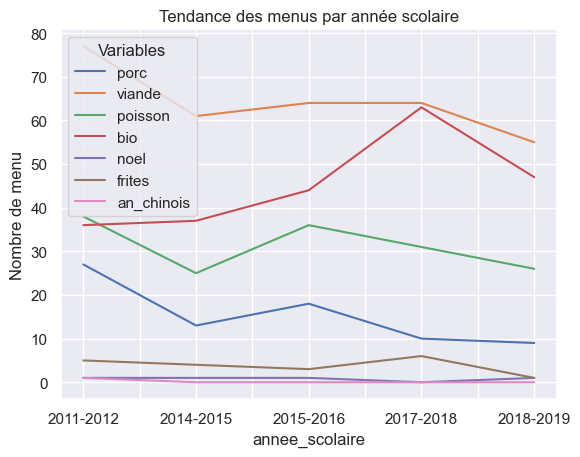

In [49]:
# Grouper les données par 'annee_scolaire' et calculer la somme de chaque variable
annees_full = ['2011-2012','2014-2015', '2015-2016', '2017-2018', '2018-2019']
grouped_data = df[df['annee_scolaire'].isin(annees_full)]

# Grouper les données par 'annee_scolaire' et calculer la somme de chaque variable
grouped_data = grouped_data.groupby(['annee_scolaire']).agg({"porc": "sum", 'viande': "sum", 'poisson': "sum", 'bio': "sum", 'noel': "sum", 'frites': "sum", 'an_chinois': "sum"})

# Tracer les courbes pour chaque variable en utilisant kind='line'
grouped_data.plot(kind="line", title="Tendance des menus par année scolaire", ylabel="Nombre de menu")
plt.legend(title='Variables')
plt.show()

In [50]:
ind6

Int64Index([100, 132, 138, 291, 292, 293, 294, 295, 296, 297, 298, 300, 301,
            302, 303, 304, 305, 307, 308, 309, 310, 311, 312, 313, 314, 315,
            316, 317, 318, 319, 320, 321, 325, 327, 328, 329, 331, 332, 333,
            334, 335, 336, 337, 338, 339, 340, 341, 342, 343, 345, 346, 347,
            348, 349, 350, 351, 352, 353, 354, 355, 356, 357, 358, 359, 360,
            361, 362, 363, 364, 365, 366, 369, 370, 446, 619, 645],
           dtype='int64')

Le creux de 2012/2013 est lié au manque de données dans la colonne menu [] = ind6
Les première et dernières années sont incomplètes

Notons la tendance des menus sans viande/porc et une augmentation des menus bio, quoiqu'en lègére baisse

## III. Analyses bivariées

In [51]:
import pandas as pd
import statsmodels.api as sm
from statsmodels.formula.api import ols

On importe les données, puis on utilise la commande lm pour régresser effectif en fonction des autres variables de l'échantillon.

In [52]:
lm = ols('ratio_freq_effectif ~ Lundi', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Lundi,1.0,0.185857,0.185857,280.349643,1.147260e-55
Residual,1001.0,0.663610,0.000663,NaN,NaN


In [53]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.219
Model:                             OLS   Adj. R-squared:                  0.218
Method:                  Least Squares   F-statistic:                     280.3
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           1.15e-55
Time:                         23:19:32   Log-Likelihood:                 2248.2
No. Observations:                 1003   AIC:                            -4492.
Df Residuals:                     1001   BIC:                            -4483.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7159      0.001    764.006      0.000       0.714       0.718
Lundi         -0.0316      0.002    -16.744      0.000      -0.035      -0.028
==============================================================================
Omnibus:                       23.902   Durbin-Watson:                   1.160
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.533
Skew:                          -0.153   Prob(JB):                     5.81e-10
Kurtosis:                       3.961   Cond. No.                         2.49
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
lm = ols('ratio_freq_effectif ~ Mardi', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Mardi,1.0,0.001752,0.001752,2.069008,0.150632
Residual,1001.0,0.847714,0.000847,NaN,NaN


In [55]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.069
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.151
Time:                         23:19:32   Log-Likelihood:                 2125.4
No. Observations:                 1003   AIC:                            -4247.
Df Residuals:                     1001   BIC:                            -4237.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7074      0.001    670.107      0.000       0.705       0.709
Mardi          0.0031      0.002      1.438      0.151      -0.001       0.007
==============================================================================
Omnibus:                        6.532   Durbin-Watson:                   1.631
Prob(Omnibus):                  0.038   Jarque-Bera (JB):                8.180
Skew:                           0.063   Prob(JB):                       0.0167
Kurtosis:                       3.424   Cond. No.                         2.50
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [56]:
lm = ols('ratio_freq_effectif ~ Jeudi', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Jeudi,1.0,0.001819,0.001819,2.147687,0.143099
Residual,1001.0,0.847648,0.000847,NaN,NaN


In [57]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     2.148
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.143
Time:                         23:19:32   Log-Likelihood:                 2125.4
No. Observations:                 1003   AIC:                            -4247.
Df Residuals:                     1001   BIC:                            -4237.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7089      0.001    672.881      0.000       0.707       0.711
Jeudi         -0.0032      0.002     -1.465      0.143      -0.007       0.001
==============================================================================
Omnibus:                        5.645   Durbin-Watson:                   1.628
Prob(Omnibus):                  0.059   Jarque-Bera (JB):                7.173
Skew:                           0.006   Prob(JB):                       0.0277
Kurtosis:                       3.414   Cond. No.                         2.51
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
lm = ols('ratio_freq_effectif ~ Vendredi', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Vendredi,1.0,0.175511,0.175511,260.678903,2.721133e-52
Residual,1001.0,0.673956,0.000673,NaN,NaN


In [59]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.207
Model:                             OLS   Adj. R-squared:                  0.206
Method:                  Least Squares   F-statistic:                     260.7
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           2.72e-52
Time:                         23:19:32   Log-Likelihood:                 2240.4
No. Observations:                 1003   AIC:                            -4477.
Df Residuals:                     1001   BIC:                            -4467.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7000      0.001    729.434      0.000       0.698       0.702
Vendredi       0.0298      0.002     16.146      0.000       0.026       0.033
==============================================================================
Omnibus:                       47.958   Durbin-Watson:                   1.180
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               94.854
Skew:                          -0.316   Prob(JB):                     2.53e-21
Kurtosis:                       4.368   Cond. No.                         2.45
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
lm = ols('ratio_freq_effectif ~ mois', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
mois,10.0,0.133783,0.013378,18.543447,2.011503e-31
Residual,992.0,0.715684,0.000721,NaN,NaN


In [61]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.157
Model:                             OLS   Adj. R-squared:                  0.149
Method:                  Least Squares   F-statistic:                     18.54
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           2.01e-31
Time:                         23:19:32   Log-Likelihood:                 2210.3
No. Observations:                 1003   AIC:                            -4399.
Df Residuals:                      992   BIC:                            -4345.
Df Model:                           10                                         
Covariance Type:             nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.7123      0.003    223.440      0.000       0.706       0.719
mois[T.Decembre]      0.0092      0.004      2.103      0.036       0.001       0.018
mois[T.Fevrier]      -0.0101      0.004     -2.302      0.022      -0.019      -0.001
mois[T.Janvier]      -0.0051      0.004     -1.274      0.203      -0.013       0.003
mois[T.Juillet]      -0.0659      0.009     -7.576      0.000      -0.083      -0.049
mois[T.Juin]         -0.0255      0.004     -6.292      0.000      -0.033      -0.018
mois[T.Mai]           0.0025      0.004      0.587      0.557      -0.006       0.011
mois[T.Mars]         -0.0026      0.004     -0.615      0.539      -0.011       0.006
mois[T.Novembre]      0.0058      0.004      1.449      0.148      -0.002       0.014
mois[T.Octobre]       0.0027      0.004      0.624      0.533      -0.006       0.011
mois[T.Septembre]    -0.0059      0.004     -1.474      0.141      -0.014       0.002
==============================================================================
Omnibus:                       13.948   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               14.466
Skew:                           0.257   Prob(JB):                     0.000722
Kurtosis:                       3.287   Cond. No.                         14.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [62]:
lm = ols('ratio_freq_effectif ~ Juillet', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
table

,df,sum_sq,mean_sq,F,PR(>F)
Juillet,1.0,0.042474,0.042474,52.685417,7.846397e-13
Residual,1001.0,0.806992,0.000806,NaN,NaN


In [63]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.050
Model:                             OLS   Adj. R-squared:                  0.049
Method:                  Least Squares   F-statistic:                     52.69
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           7.85e-13
Time:                         23:19:32   Log-Likelihood:                 2150.1
No. Observations:                 1003   AIC:                            -4296.
Df Residuals:                     1001   BIC:                            -4286.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7088      0.001    786.252      0.000       0.707       0.711
Juillet       -0.0625      0.009     -7.258      0.000      -0.079      -0.046
==============================================================================
Omnibus:                        6.310   Durbin-Watson:                   1.765
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                6.698
Skew:                           0.134   Prob(JB):                       0.0351
Kurtosis:                       3.298   Cond. No.                         9.60
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [64]:
lm = ols('ratio_freq_effectif ~ Juin', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.070
Model:                             OLS   Adj. R-squared:                  0.069
Method:                  Least Squares   F-statistic:                     75.13
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           1.75e-17
Time:                         23:19:32   Log-Likelihood:                 2160.7
No. Observations:                 1003   AIC:                            -4317.
Df Residuals:                     1001   BIC:                            -4307.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7109      0.001    753.984      0.000       0.709       0.713
Juin          -0.0241      0.003     -8.667      0.000      -0.030      -0.019
==============================================================================
Omnibus:                        8.914   Durbin-Watson:                   1.804
Prob(Omnibus):                  0.012   Jarque-Bera (JB):               11.149
Skew:                           0.113   Prob(JB):                      0.00379
Kurtosis:                       3.465   Cond. No.                         3.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
lm = ols('ratio_freq_effectif ~ Fevrier', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.004
Model:                             OLS   Adj. R-squared:                  0.003
Method:                  Least Squares   F-statistic:                     3.598
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):             0.0581
Time:                         23:19:32   Log-Likelihood:                 2126.2
No. Observations:                 1003   AIC:                            -4248.
Df Residuals:                     1001   BIC:                            -4239.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7086      0.001    741.152      0.000       0.707       0.710
Fevrier       -0.0065      0.003     -1.897      0.058      -0.013       0.000
==============================================================================
Omnibus:                        5.935   Durbin-Watson:                   1.666
Prob(Omnibus):                  0.051   Jarque-Bera (JB):                7.612
Skew:                           0.017   Prob(JB):                       0.0222
Kurtosis:                       3.425   Cond. No.                         3.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
lm = ols('ratio_freq_effectif ~ Decembre', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.018
Model:                             OLS   Adj. R-squared:                  0.017
Method:                  Least Squares   F-statistic:                     18.78
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           1.61e-05
Time:                         23:19:32   Log-Likelihood:                 2133.7
No. Observations:                 1003   AIC:                            -4263.
Df Residuals:                     1001   BIC:                            -4254.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7069      0.001    743.758      0.000       0.705       0.709
Decembre       0.0145      0.003      4.334      0.000       0.008       0.021
==============================================================================
Omnibus:                        4.043   Durbin-Watson:                   1.684
Prob(Omnibus):                  0.132   Jarque-Bera (JB):                4.714
Skew:                           0.022   Prob(JB):                       0.0947
Kurtosis:                       3.333   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
lm = ols('ratio_freq_effectif ~ Janvier', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.1495
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.699
Time:                         23:19:32   Log-Likelihood:                 2124.4
No. Observations:                 1003   AIC:                            -4245.
Df Residuals:                     1001   BIC:                            -4235.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7082      0.001    720.459      0.000       0.706       0.710
Janvier       -0.0011      0.003     -0.387      0.699      -0.007       0.004
==============================================================================
Omnibus:                        5.802   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.055   Jarque-Bera (JB):                7.319
Skew:                           0.032   Prob(JB):                       0.0257
Kurtosis:                       3.413   Cond. No.                         3.08
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [68]:
lm = ols('ratio_freq_effectif ~ Mars', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.2696
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.604
Time:                         23:19:32   Log-Likelihood:                 2124.5
No. Observations:                 1003   AIC:                            -4245.
Df Residuals:                     1001   BIC:                            -4235.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7080      0.001    734.428      0.000       0.706       0.710
Mars           0.0017      0.003      0.519      0.604      -0.005       0.008
==============================================================================
Omnibus:                        5.680   Durbin-Watson:                   1.660
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.107
Skew:                           0.035   Prob(JB):                       0.0286
Kurtosis:                       3.406   Cond. No.                         3.53
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [69]:
lm = ols('ratio_freq_effectif ~ Avril', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.002
Model:                             OLS   Adj. R-squared:                  0.001
Method:                  Least Squares   F-statistic:                     1.547
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.214
Time:                         23:19:33   Log-Likelihood:                 2125.1
No. Observations:                 1003   AIC:                            -4246.
Df Residuals:                     1001   BIC:                            -4236.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7078      0.001    742.330      0.000       0.706       0.710
Avril          0.0045      0.004      1.244      0.214      -0.003       0.011
==============================================================================
Omnibus:                        6.412   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                8.242
Skew:                           0.040   Prob(JB):                       0.0162
Kurtosis:                       3.437   Cond. No.                         3.92
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [70]:
lm = ols('ratio_freq_effectif ~ Mai', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     5.604
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):             0.0181
Time:                         23:19:33   Log-Likelihood:                 2127.2
No. Observations:                 1003   AIC:                            -4250.
Df Residuals:                     1001   BIC:                            -4241.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7074      0.001    732.564      0.000       0.706       0.709
Mai            0.0073      0.003      2.367      0.018       0.001       0.013
==============================================================================
Omnibus:                        5.925   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.052   Jarque-Bera (JB):                7.282
Skew:                           0.058   Prob(JB):                       0.0262
Kurtosis:                       3.401   Cond. No.                         3.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [71]:
lm = ols('ratio_freq_effectif ~ Septembre', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.5104
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.475
Time:                         23:19:33   Log-Likelihood:                 2124.6
No. Observations:                 1003   AIC:                            -4245.
Df Residuals:                     1001   BIC:                            -4235.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7084      0.001    719.886      0.000       0.706       0.710
Septembre     -0.0020      0.003     -0.714      0.475      -0.007       0.003
==============================================================================
Omnibus:                        5.889   Durbin-Watson:                   1.662
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                7.480
Skew:                           0.029   Prob(JB):                       0.0237
Kurtosis:                       3.419   Cond. No.                         3.06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
lm = ols('ratio_freq_effectif ~ Octobre', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     5.367
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):             0.0207
Time:                         23:19:33   Log-Likelihood:                 2127.0
No. Observations:                 1003   AIC:                            -4250.
Df Residuals:                     1001   BIC:                            -4240.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7075      0.001    736.164      0.000       0.706       0.709
Octobre        0.0075      0.003      2.317      0.021       0.001       0.014
==============================================================================
Omnibus:                        5.838   Durbin-Watson:                   1.669
Prob(Omnibus):                  0.054   Jarque-Bera (JB):                7.281
Skew:                           0.045   Prob(JB):                       0.0262
Kurtosis:                       3.408   Cond. No.                         3.55
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
lm = ols('ratio_freq_effectif ~ Novembre', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.016
Model:                             OLS   Adj. R-squared:                  0.015
Method:                  Least Squares   F-statistic:                     15.97
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           6.90e-05
Time:                         23:19:33   Log-Likelihood:                 2132.3
No. Observations:                 1003   AIC:                            -4261.
Df Residuals:                     1001   BIC:                            -4251.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7068      0.001    727.510      0.000       0.705       0.709
Novembre       0.0113      0.003      3.996      0.000       0.006       0.017
==============================================================================
Omnibus:                        6.218   Durbin-Watson:                   1.693
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                7.783
Skew:                           0.055   Prob(JB):                       0.0204
Kurtosis:                       3.417   Cond. No.                         3.15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
lm = ols('ratio_freq_effectif ~ veille_ferie', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.6341
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.426
Time:                         23:19:33   Log-Likelihood:                 2124.7
No. Observations:                 1003   AIC:                            -4245.
Df Residuals:                     1001   BIC:                            -4236.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7082      0.001    766.692      0.000       0.706       0.710
veille_ferie    -0.0078      0.010     -0.796      0.426      -0.027       0.011
==============================================================================
Omnibus:                        4.594   Durbin-Watson:                   1.657
Prob(Omnibus):                  0.101   Jarque-Bera (JB):                5.371
Skew:                           0.047   Prob(JB):                       0.0682
Kurtosis:                       3.346   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [75]:
lm = ols('ratio_freq_effectif ~ retour_ferie', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.3695
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.543
Time:                         23:19:33   Log-Likelihood:                 2124.5
No. Observations:                 1003   AIC:                            -4245.
Df Residuals:                     1001   BIC:                            -4235.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        0.7082      0.001    762.734      0.000       0.706       0.710
retour_ferie    -0.0041      0.007     -0.608      0.543      -0.017       0.009
==============================================================================
Omnibus:                        5.632   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                7.086
Skew:                           0.026   Prob(JB):                       0.0289
Kurtosis:                       3.408   Cond. No.                         7.34
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [76]:
lm = ols('ratio_freq_effectif ~ retour_vacances', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.006
Model:                             OLS   Adj. R-squared:                  0.005
Method:                  Least Squares   F-statistic:                     6.148
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):             0.0133
Time:                         23:19:33   Log-Likelihood:                 2127.4
No. Observations:                 1003   AIC:                            -4251.
Df Residuals:                     1001   BIC:                            -4241.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7085      0.001    760.221      0.000       0.707       0.710
retour_vacances    -0.0129      0.005     -2.480      0.013      -0.023      -0.003
==============================================================================
Omnibus:                        6.281   Durbin-Watson:                   1.630
Prob(Omnibus):                  0.043   Jarque-Bera (JB):                8.181
Skew:                           0.015   Prob(JB):                       0.0167
Kurtosis:                       3.441   Cond. No.                         5.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [77]:
lm = ols('ratio_freq_effectif ~ veille_vacances', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.009
Model:                             OLS   Adj. R-squared:                  0.008
Method:                  Least Squares   F-statistic:                     8.734
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):            0.00320
Time:                         23:19:33   Log-Likelihood:                 2128.7
No. Observations:                 1003   AIC:                            -4253.
Df Residuals:                     1001   BIC:                            -4244.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7076      0.001    761.425      0.000       0.706       0.709
veille_vacances     0.0162      0.005      2.955      0.003       0.005       0.027
==============================================================================
Omnibus:                        6.958   Durbin-Watson:                   1.658
Prob(Omnibus):                  0.031   Jarque-Bera (JB):                9.260
Skew:                           0.026   Prob(JB):                      0.00976
Kurtosis:                       3.468   Cond. No.                         5.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [78]:
lm = ols('ratio_freq_effectif ~ fete_musulmane', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.003
Model:                             OLS   Adj. R-squared:                  0.002
Method:                  Least Squares   F-statistic:                     2.613
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.106
Time:                         23:19:33   Log-Likelihood:                 2125.7
No. Observations:                 1003   AIC:                            -4247.
Df Residuals:                     1001   BIC:                            -4238.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.7083      0.001    762.578      0.000       0.707       0.710
fete_musulmane    -0.0101      0.006     -1.617      0.106      -0.022       0.002
==============================================================================
Omnibus:                        6.181   Durbin-Watson:                   1.647
Prob(Omnibus):                  0.045   Jarque-Bera (JB):                7.960
Skew:                           0.027   Prob(JB):                       0.0187
Kurtosis:                       3.433   Cond. No.                         6.83
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
lm = ols('ratio_freq_effectif ~ ramadan', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.005
Model:                             OLS   Adj. R-squared:                  0.004
Method:                  Least Squares   F-statistic:                     5.008
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):             0.0255
Time:                         23:19:33   Log-Likelihood:                 2126.9
No. Observations:                 1003   AIC:                            -4250.
Df Residuals:                     1001   BIC:                            -4240.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7086      0.001    750.042      0.000       0.707       0.710
ramadan       -0.0089      0.004     -2.238      0.025      -0.017      -0.001
==============================================================================
Omnibus:                        5.406   Durbin-Watson:                   1.664
Prob(Omnibus):                  0.067   Jarque-Bera (JB):                6.605
Skew:                           0.045   Prob(JB):                       0.0368
Kurtosis:                       3.387   Cond. No.                         4.33
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
lm = ols('ratio_freq_effectif ~ fete_chretienne', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                  0.008038
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.929
Time:                         23:19:34   Log-Likelihood:                 2124.4
No. Observations:                 1003   AIC:                            -4245.
Df Residuals:                     1001   BIC:                            -4235.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.7081      0.001    739.674      0.000       0.706       0.710
fete_chretienne     0.0003      0.003      0.090      0.929      -0.006       0.007
==============================================================================
Omnibus:                        5.635   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.060   Jarque-Bera (JB):                7.048
Skew:                           0.034   Prob(JB):                       0.0295
Kurtosis:                       3.405   Cond. No.                         3.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
lm = ols('ratio_freq_effectif ~ fete_juive', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.000
Model:                             OLS   Adj. R-squared:                 -0.001
Method:                  Least Squares   F-statistic:                    0.4457
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.505
Time:                         23:19:34   Log-Likelihood:                 2124.6
No. Observations:                 1003   AIC:                            -4245.
Df Residuals:                     1001   BIC:                            -4235.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7082      0.001    758.907      0.000       0.706       0.710
fete_juive    -0.0037      0.005     -0.668      0.505      -0.014       0.007
==============================================================================
Omnibus:                        5.701   Durbin-Watson:                   1.655
Prob(Omnibus):                  0.058   Jarque-Bera (JB):                7.189
Skew:                           0.028   Prob(JB):                       0.0275
Kurtosis:                       3.411   Cond. No.                         5.97
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [82]:
lm = ols('ratio_freq_effectif ~ porc', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.026
Model:                             OLS   Adj. R-squared:                  0.025
Method:                  Least Squares   F-statistic:                     26.40
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           3.33e-07
Time:                         23:19:34   Log-Likelihood:                 2137.4
No. Observations:                 1003   AIC:                            -4271.
Df Residuals:                     1001   BIC:                            -4261.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7100      0.001    727.013      0.000       0.708       0.712
porc          -0.0136      0.003     -5.138      0.000      -0.019      -0.008
==============================================================================
Omnibus:                        6.432   Durbin-Watson:                   1.637
Prob(Omnibus):                  0.040   Jarque-Bera (JB):                8.166
Skew:                          -0.051   Prob(JB):                       0.0169
Kurtosis:                       3.430   Cond. No.                         2.98
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [83]:
lm = ols('ratio_freq_effectif ~ viande', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.217
Model:                             OLS   Adj. R-squared:                  0.216
Method:                  Least Squares   F-statistic:                     277.3
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           3.87e-55
Time:                         23:19:34   Log-Likelihood:                 2247.0
No. Observations:                 1003   AIC:                            -4490.
Df Residuals:                     1001   BIC:                            -4480.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7234      0.001    590.592      0.000       0.721       0.726
viande        -0.0273      0.002    -16.651      0.000      -0.031      -0.024
==============================================================================
Omnibus:                       69.930   Durbin-Watson:                   1.127
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.817
Skew:                          -0.454   Prob(JB):                     7.18e-31
Kurtosis:                       4.580   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [84]:
lm = ols('ratio_freq_effectif ~ poisson', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.181
Model:                             OLS   Adj. R-squared:                  0.180
Method:                  Least Squares   F-statistic:                     221.1
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           2.49e-45
Time:                         23:19:34   Log-Likelihood:                 2224.4
No. Observations:                 1003   AIC:                            -4445.
Df Residuals:                     1001   BIC:                            -4435.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7007      0.001    721.994      0.000       0.699       0.703
poisson        0.0281      0.002     14.868      0.000       0.024       0.032
==============================================================================
Omnibus:                       38.874   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.005
Skew:                          -0.248   Prob(JB):                     1.90e-17
Kurtosis:                       4.264   Cond. No.                         2.46
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [85]:
lm = ols('ratio_freq_effectif ~ bio', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.019
Model:                             OLS   Adj. R-squared:                  0.018
Method:                  Least Squares   F-statistic:                     19.41
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           1.17e-05
Time:                         23:19:34   Log-Likelihood:                 2134.0
No. Observations:                 1003   AIC:                            -4264.
Df Residuals:                     1001   BIC:                            -4254.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7049      0.001    602.395      0.000       0.703       0.707
bio            0.0082      0.002      4.406      0.000       0.005       0.012
==============================================================================
Omnibus:                        6.768   Durbin-Watson:                   1.681
Prob(Omnibus):                  0.034   Jarque-Bera (JB):                9.012
Skew:                           0.007   Prob(JB):                       0.0110
Kurtosis:                       3.464   Cond. No.                         2.44
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [86]:
lm = ols('ratio_freq_effectif ~ noel', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.032
Model:                             OLS   Adj. R-squared:                  0.031
Method:                  Least Squares   F-statistic:                     32.56
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):           1.52e-08
Time:                         23:19:34   Log-Likelihood:                 2140.4
No. Observations:                 1003   AIC:                            -4277.
Df Residuals:                     1001   BIC:                            -4267.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7077      0.001    779.045      0.000       0.706       0.709
noel           0.0620      0.011      5.706      0.000       0.041       0.083
==============================================================================
Omnibus:                        4.231   Durbin-Watson:                   1.695
Prob(Omnibus):                  0.121   Jarque-Bera (JB):                4.928
Skew:                          -0.035   Prob(JB):                       0.0851
Kurtosis:                       3.336   Cond. No.                         12.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
lm = ols('ratio_freq_effectif ~ frites', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.9905
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.320
Time:                         23:19:34   Log-Likelihood:                 2124.9
No. Observations:                 1003   AIC:                            -4246.
Df Residuals:                     1001   BIC:                            -4236.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7079      0.001    757.652      0.000       0.706       0.710
frites         0.0052      0.005      0.995      0.320      -0.005       0.015
==============================================================================
Omnibus:                        6.087   Durbin-Watson:                   1.659
Prob(Omnibus):                  0.048   Jarque-Bera (JB):                7.693
Skew:                           0.043   Prob(JB):                       0.0214
Kurtosis:                       3.420   Cond. No.                         5.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [88]:
lm = ols('ratio_freq_effectif ~ an_chinois', data = df_final).fit()
import statsmodels.api;
table = sm.stats.anova_lm(lm)
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     ratio_freq_effectif   R-squared:                       0.001
Model:                             OLS   Adj. R-squared:                 -0.000
Method:                  Least Squares   F-statistic:                    0.9639
Date:                 Wed, 19 Jul 2023   Prob (F-statistic):              0.326
Time:                         23:19:34   Log-Likelihood:                 2124.8
No. Observations:                 1003   AIC:                            -4246.
Df Residuals:                     1001   BIC:                            -4236.
Df Model:                            1                                         
Covariance Type:             nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.7082      0.001    769.107      0.000       0.706       0.710
an_chinois    -0.0165      0.017     -0.982      0.326      -0.050       0.017
==============================================================================
Omnibus:                        5.737   Durbin-Watson:                   1.661
Prob(Omnibus):                  0.057   Jarque-Bera (JB):                7.219
Skew:                           0.032   Prob(JB):                       0.0271
Kurtosis:                       3.411   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import t, shapiro
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#import statsmodels
#from functions import *

## IV. Analyse multivariées

In [90]:
reg_multi = smf.ols('reel~-1+effectif+retour_vacances+veille_vacances+ramadan+porc+viande+poisson+bio+noel+Mai+Juin+Juillet+Octobre+Novembre+Decembre+Lundi+Vendredi', data=df_final).fit()
print(reg_multi.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.397e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:19:34   Log-Likelihood:                         -7304.3
No. Observations:                1003   AIC:                                  1.464e+04
Df Residuals:                     986   BIC:                                  1.473e+04
Df Model:                          17                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [91]:
reg_multi = smf.ols('reel~-1+effectif+veille_vacances+ramadan+porc+viande+poisson+bio+noel+Mai+Juin+Juillet+Octobre+Novembre+Decembre+Lundi+Vendredi', data=df_final).fit()
print(reg_multi.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          8.926e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:19:34   Log-Likelihood:                         -7304.5
No. Observations:                1003   AIC:                                  1.464e+04
Df Residuals:                     987   BIC:                                  1.472e+04
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [92]:
reg_multi = smf.ols('reel~-1+effectif+veille_vacances+ramadan+viande+poisson+bio+noel+Mai+Juin+Juillet+Octobre+Novembre+Decembre+Lundi+Vendredi', data=df_final).fit()
print(reg_multi.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          9.529e+04
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:19:35   Log-Likelihood:                         -7304.6
No. Observations:                1003   AIC:                                  1.464e+04
Df Residuals:                     988   BIC:                                  1.471e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

In [93]:
reg_multi2 = smf.ols('reel~-1+effectif+viande+poisson+bio+Juin+Juillet+Novembre+Decembre+Lundi', data=df_final).fit()
print(reg_multi2.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.999
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                          1.426e+05
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:19:35   Log-Likelihood:                         -7361.6
No. Observations:                1003   AIC:                                  1.474e+04
Df Residuals:                     994   BIC:                                  1.479e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [94]:
reg_multi3 = smf.ols('reel~-1+Fevrier+Janvier+Avril+Septembre+Octobre+Novembre+ramadan+porc+viande+bio', data=df_final).fit()
print(reg_multi3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              372.9
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:19:35   Log-Likelihood:                         -10172.
No. Observations:                1003   AIC:                                  2.036e+04
Df Residuals:                     993   BIC:                                  2.041e+04
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [95]:
reg_multi3 = smf.ols('reel~-1+Fevrier+Janvier+Avril+Septembre+Octobre+Novembre+ramadan+viande+bio', data=df_final).fit()
print(reg_multi3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              414.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:19:35   Log-Likelihood:                         -10173.
No. Observations:                1003   AIC:                                  2.036e+04
Df Residuals:                     994   BIC:                                  2.041e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [96]:
print(reg_multi3.summary())

                                 OLS Regression Results                                
Dep. Variable:                   reel   R-squared (uncentered):                   0.790
Model:                            OLS   Adj. R-squared (uncentered):              0.788
Method:                 Least Squares   F-statistic:                              414.4
Date:                Wed, 19 Jul 2023   Prob (F-statistic):                        0.00
Time:                        23:19:35   Log-Likelihood:                         -10173.
No. Observations:                1003   AIC:                                  2.036e+04
Df Residuals:                     994   BIC:                                  2.041e+04
Df Model:                           9                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [97]:
import warnings
warnings.filterwarnings('ignore')

### Jeu de train / jeu de test

In [98]:
# Mettre les variables étant toutes à la même échelle, il reste à les standardiser à l'échelle de l'effectif

def echelle_variables(col):
    df_final[col] = df_final[col] * df_final["effectif"]

columns_to_scale = ['greves', 'ferie', 'veille_ferie', 'retour_ferie', 'vacances', 'retour_vacances',
                   'veille_vacances', 'fete_musulmane', 'ramadan', 'fete_chretienne',
                   'fete_juive', 'porc', 'viande', 'poisson', 'bio', 'noel',
                   'frites', 'an_chinois', 'Avril', 'Decembre',
                   'Fevrier', 'Janvier', 'Juillet', 'Juin', 'Mai', 'Mars', 'Novembre',
                   'Octobre', 'Septembre', 'Jeudi', 'Lundi', 'Mardi', 'Vendredi']

for col in columns_to_scale:
    echelle_variables(col)

Le modèle sera entrainé sur toutes les années scolaires pour un maximum de données, à l'exception de l'année scolaire 2018-2019, réservée pour le test

In [99]:
from sklearn.model_selection import train_test_split
#features = ['effectif','viande','poisson','bio','Juin','Juillet','Novembre','Decembre','Lundi']
features = ['effectif','retour_vacances','veille_vacances','ramadan','porc','viande','poisson','noel','Mai','Juin','Juillet','Octobre','Novembre','Decembre','Lundi','Vendredi']
#features = ['effectif', 'Fevrier', 'Janvier', 'Avril', 'Septembre', 'Octobre', 'Novembre', 'ramadan', 'viande', 'bio']
target = ['reel']

# Filtrer le DataFrame en fonction de la colonne "année"
df_train = df_final[df_final['annee_scolaire'] != '2018-2019']
df_test = df_final[df_final['annee_scolaire'] == '2018-2019']

# Diviser le jeu de données filtré en ensembles d'entraînement et de test
#X_train, X_test, y_train, y_test = train_test_split(df_train[X], df_train[y], test_size=0.2, random_state=42)

In [100]:
X_train = df_train[features]
X_test = df_test[features]
y_train = df_train[target]
y_test = df_test[target]

## Testons des algo

In [101]:
from sklearn.metrics import get_scorer_names


In [102]:
from sklearn.linear_model import SGDRegressor 
model = SGDRegressor(max_iter=1000, eta0=0.001)
model.fit(X_train,y_train)
print('Coeff R2 =', model.score(X_test, y_test))

Coeff R2 = -2.504417201578746e+27


In [103]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0) 
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train,y_train)
print('Coeff R2 =', regr.score(X_test, y_test))

Coeff R2 = 0.061876221299487555


In [104]:
from sklearn.ensemble import HistGradientBoostingRegressor
est = HistGradientBoostingRegressor().fit(X_train,y_train)
print('Coeff R2 =',est.score(X_test, y_test))

Coeff R2 = -0.3870877676864759


In [105]:
from sklearn.neighbors import KNeighborsRegressor

# Instancier le modèle KNeighborsRegressor avec 5 voisins
knn = KNeighborsRegressor(n_neighbors=1)

# Entraîner le modèle sur les données d'entraînement
knn.fit(X_train, y_train)

# Calculer et afficher le score R2 sur les données de test
print('Coeff R2 =', knn.score(X_test, y_test))

Coeff R2 = -0.46403264642705344


In [106]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.neighbors import KNeighborsRegressor

# Instancier les modèles individuels
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
r3 = KNeighborsRegressor()

# Créer l'objet VotingRegressor
er = VotingRegressor([('lr', r1), ('rf', r2), ('r3', r3)])

# Entraîner le modèle VotingRegressor sur les données d'entraînement
er.fit(X_train, y_train)

# Calculer le score R2 sur les données de test
score = er.score(X_test, y_test)

# Afficher le score R2
print('Coeff R2 =', score)

# Calculer et afficher les prédictions du modèle sur les données de test
predictions = er.predict(X_test)

Coeff R2 = 0.3619934691509583


###### 

In [107]:
from sklearn import linear_model

# Instancier le modèle de régression Lasso avec un alpha de 0.1
clf2 = linear_model.Lasso(alpha=0.1)

# Entraîner le modèle sur les données d'entraînement
clf2.fit(X_train, y_train)

# Calculer et afficher le score R2 sur les données de test
print('Coeff R2 =', clf2.score(X_test, y_test))

# Afficher l'intercept du modèle
#print(clf2.intercept_)

Coeff R2 = 0.48593872943161975


In [108]:
from sklearn.linear_model import Ridge
import numpy as np

# Définir le générateur de nombres aléatoires
rng = np.random.RandomState(0)

# Instancier le modèle de régression Ridge avec un alpha de 1.0
clf = Ridge(alpha=1.0)

# Entraîner le modèle sur les données d'entraînement
clf.fit(X_train, y_train)

# Faire les prédictions sur les données de test
y_pred = clf.predict(X_test)

# Calculer le score R2 sur les données de test
score = clf.score(X_test, y_test)

# Afficher les prédictions et le score
#print("Prédictions :", y_pred)
print("Score R2 :", score)

Score R2 : 0.4859385566319374


In [109]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr_baseline = lr.fit(X_train, y_train)
baseline_pred = lr_baseline.predict(X_test)
score = lr_baseline.score(X_test, y_test)
print('Coeff R2 Tain=', lr_baseline.score(X_train, y_train))
print('Coeff R2 Test=', lr_baseline.score(X_test, y_test))

Coeff R2 Tain= 0.900510498339701
Coeff R2 Test= 0.4859385543605781


In [110]:
from sklearn.linear_model import ElasticNet
regressor = ElasticNet()
regressor.fit(X_train, y_train)
score = regressor.score(X_train, y_train) 
print('Coeff R2 Train=', regressor.score(X_train, y_train))
print('Coeff R2 Test=', regressor.score(X_test, y_test))

Coeff R2 Train= 0.9005104983379942
Coeff R2 Test= 0.48594047233433235


### Mettons en application la crossval

In [111]:
from sklearn.model_selection import cross_val_score

In [112]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
scores = cross_val_score(lr, X_train, y_train, cv=5, scoring='r2')
mean_score = scores.mean()
print('Coeff R2 =', mean_score)

Coeff R2 = 0.6064999820391688


In [113]:
from sklearn.ensemble import GradientBoostingRegressor
from  sklearn import model_selection 

# Fixer les valeurs des hyperparamètres à tester
param_grid = {'n_estimators':[10,20,30,40,100,200,300], 'learning_rate':[0.1,0.2,0.3], "max_depth" : [1,2,3,10]}

# Choisir un score à optimiser, ici l'accuracy (proportion de prédictions correctes)
score = 'r2'

# Créer un classifieur kNN avec recherche d'hyperparamètre par validation croisée
GBR = model_selection.GridSearchCV(
    GradientBoostingRegressor(), # 
    param_grid,     # hyperparamètres à tester
    cv=5,           # nombre de folds de validation croisée
    scoring=score   # score à optimiser
)

In [114]:
# Optimiser ce classifieur sur le jeu d'entraînement
GBR.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(GBR.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        GBR.cv_results_['mean_test_score'], # score moyen
        GBR.cv_results_['std_test_score'],  # écart-type du score
        GBR.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )



Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:
{'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
Résultats de la validation croisée :
r2 = -1.574 (+/-3.254) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 10}
r2 = -0.909 (+/-2.068) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 20}
r2 = -0.607 (+/-1.585) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 30}
r2 = -0.418 (+/-1.337) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 40}
r2 = 0.018 (+/-0.864) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 100}
r2 = 0.141 (+/-0.725) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 200}
r2 = 0.168 (+/-0.693) for {'learning_rate': 0.1, 'max_depth': 1, 'n_estimators': 300}
r2 = -1.093 (+/-2.311) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 10}
r2 = -0.476 (+/-1.570) for {'learning_rate': 0.1, 'max_depth': 2, 'n_estimators': 20}
r2 = -0.233 (+/-1.228) for {'learning_rate': 0.1, 'max_depth': 2, 'n_est

In [115]:
from  sklearn import model_selection 
from sklearn.linear_model import ElasticNet

# Fixer les valeurs des hyperparamètres à tester / on peut donner les 2 paramètres ElasticNet(alpha = 1, l1_ratio = 0.5) :
# alpha est le coefficient global du terme de régularisation (plus il est élevé, plus la pénalité est forte)
# l1_ratio est la pondération entre 0 et 1 affectée à L1 (1 - l1_ratio affectée à L2)

param_grid = {
                'alpha'     : [0.1,1,10,0.01],
                'l1_ratio'  :  np.arange(0.40,1.00,0.10),
                'tol'       : [0.0001,0.001]
            }

# Choisir un score à optimiser, ici le R2 (proportion de prédictions correctes)
score = 'r2'

# Créer une régression ElasticNet avec recherche d'hyperparamètre par validation croisée
eNet = ElasticNet(max_iter=10000)

ELN = GridSearchCV(eNet, # combine une régularisation de type L2 (ridge regression) avec une régularisation de type L1 (LASSO)
                           param_grid,  # hyperparamètres à tester 
                           scoring='r2', # score à optimiser
                           cv = 5,  # nombre de folds de validation croisée
                          )

# return_train_score=True,
#                           n_jobs = -1

NameError: name 'GridSearchCV' is not defined

In [ ]:
# Optimiser ce classifieur sur le jeu d'entraînement
ELN.fit(X_train, y_train)

# Afficher le(s) hyperparamètre(s) optimaux
print("Meilleur(s) hyperparamètre(s) sur le jeu d'entraînement:")
print(ELN.best_params_)

# Afficher les performances correspondantes
print("Résultats de la validation croisée :")
for mean, std, params in zip(
        ELN.cv_results_['mean_test_score'], # score moyen
        ELN.cv_results_['std_test_score'],  # écart-type du score
        ELN.cv_results_['params']           # valeur de l'hyperparamètre
    ):

    print("{} = {:.3f} (+/-{:.03f}) for {}".format(
        score,
        mean,
        std*2,
        params
    ) )


In [ ]:
# Effectuez une validation croisée k-fold (par exemple, k=5)
cross_val_scores = cross_val_score(ELN, X_train, y_train, cv=5, scoring='r2')

# Le score retourné est généralement négatif, vous pouvez obtenir le score moyen en prenant la moyenne
mean_r2 = cross_val_scores.mean()

# Afficher le score moyen
print("Mean R2:", mean_r2)

On remarque qu'à présent, tous les paramètres sont significatifs. 
Quant au 𝑅2, il vaut environ 0.606, tout comme le 𝑅2 ajusté.

On peut donc utiliser ce modèle à des fins de prévision !

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Calculez les courbes d'apprentissage avec différentes tailles de jeu d'entraînement
train_sizes, train_scores, val_scores = learning_curve(ELN, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5, scoring='r2')

# Calculez les scores moyens et les écart-types
train_scores_mean = -np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = -np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Tracez les courbes d'apprentissage
plt.figure()
plt.plot(train_sizes, train_scores_mean, 'o-', label='Training score')
plt.plot(train_sizes, val_scores_mean, 'o-', label='Cross-validation score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1)
plt.fill_between(train_sizes, val_scores_mean - val_scores_std, val_scores_mean + val_scores_std, alpha=0.1)
plt.xlabel('Training set size')
plt.ylabel('R2')
plt.legend(loc='best')
plt.show()

## VI. Tester le modèle

In [ ]:
from sklearn import metrics
y_pred = ELN.predict(X_test)
print("\nSur le jeu de test : {:.3f}".format(metrics.r2_score(y_test, y_pred)))

In [ ]:
from sklearn import metrics
y_pred_train = ELN.predict(X_train)
print("\nSur le jeu de train : {:.3f}".format(metrics.r2_score(y_train, y_pred_train)))

In [ ]:
# l'évaluation du modèle porte sur l'année scolaire 2018-2019
eval = df_final[df_final["annee_scolaire"]=="2018-2019"]

# Ajustement du modèle avec un coeffiscient
eval["pred"] =np.array(y_pred) 

eval[["reel","pred"]].plot()

In [ ]:
# Ajoutons 2 colonnes dans ce dataframe d'évaluation pour mesurer les écarts entre les prévisions des ATR et le réel
# et les écarts entre les prédictions de notre modèle et le réel
eval["écart_ATR"] = eval["prevision"] - eval["reel"]
eval["écart_modele"] = eval["pred"] - eval["reel"]

### Y-a-t'il eu de la sous prévision de la part des ATR ?

In [ ]:
eval[eval["prevision"] < eval["reel"]]

### Y-a-t'il eu de la sous prédiction de la part du modèle IA ?

In [ ]:
eval[eval["pred"] < eval["reel"]]

### Résultat 1

In [ ]:
# Ajustement du modèle avec un coeffiscient
eval["pred"] =np.array(y_pred) * (1+0.0207)
#eval["pred"] =np.array(y_pred) * (1+0.0205)

eval[["reel","pred"]].plot()

In [ ]:
eval["écart_ATR"] = eval["prevision"] - eval["reel"]
eval["écart_modele"] = eval["pred"] - eval["reel"]
eval[eval["prevision"] < eval["reel"]]

In [ ]:
eval[eval["pred"] < eval["reel"]]

Le modèle IA est acceptable, car il y a 5 jours où les prédictions sont inférieures au réel.
Et les écarts étant > moins 200 repas, cela signifie que chaque élève pourra avoir son repas.
Cet arrangement implique parmi le personnel scolaire, certains auront un repas de substitution.

In [ ]:
# Calcul de l performance du modèle IA par rapport à l'expérience des ATR
waste_ATR = eval[eval["prevision"] > eval["reel"]]["écart_ATR"].sum()
waste_ia = eval[eval["pred"] > eval["reel"]]["écart_modele"].sum()
perf = (waste_ATR - waste_ia)/waste_ATR*100
perf_arrondi = round(perf, 2)

# Afficher le résultat en %
print("Notre modèle IA est plus performant de:", perf_arrondi, "%")

In [ ]:
# Calculer les économies si les prédictions de la fréquention des cantines avait été réalisé par notre IA 
import math
saving = (waste_ATR - waste_ia)
saving_arrondi = math.ceil(saving)
money = saving_arrondi * 3

# Afficher le résultat en %
print ('Le modèle permet de réduire le gaspillage alimentaire en sauvant',saving_arrondi, "repas")
print("En faisant appel à notre modèle d'IA, vous auriez réaliser une économie de:", money, "€")

### Résultat 2

In [ ]:
# Ajustement du modèle avec un coeffiscient
#eval["pred"] =np.array(y_pred) * (1+0.0207)
eval["pred"] =np.array(y_pred) * (1+0.035)

eval[["reel","pred"]].plot()

In [ ]:
eval["écart_ATR"] = eval["prevision"] - eval["reel"]
eval["écart_modele"] = eval["pred"] - eval["reel"]
eval[eval["prevision"] < eval["reel"]]

In [ ]:
eval[eval["pred"] < eval["reel"]]

Le modèle IA est acceptable, car il y a 0 jours où les prédictions sont inférieures au réel.
Cela signifie que chaque élève ET chaque personnel scolaire pourront avoir un repas.

In [ ]:
# Calcul de l performance du modèle IA par rapport à l'expérience des ATR
waste_ATR = eval[eval["prevision"] > eval["reel"]]["écart_ATR"].sum()
waste_ia = eval[eval["pred"] > eval["reel"]]["écart_modele"].sum()
perf = (waste_ATR - waste_ia)/waste_ATR*100
perf_arrondi = round(perf, 2)

# Afficher le résultat en %
print("Notre modèle IA est plus performant de:", perf_arrondi, "%")

In [ ]:
# Calculer les économies si les prédictions de la fréquention des cantines avait été réalisé par notre IA 
import math
saving = (waste_ATR - waste_ia)
saving_arrondi = math.ceil(saving)
money = saving_arrondi * 3

# Afficher le résultat en %
print ('Le modèle permet de réduire le gaspillage alimentaire en sauvant',saving_arrondi, "repas")
print("En faisant appel à notre modèle d'IA, vous auriez réaliser une économie de:", money, "€")